# A. Предсказание движения беспилотного автомобиля

Когда в XIX веке на улицах Великобритании появились первые самоходные повозки, они вызвали у людей скорее страх и недоверие, чем восторг. Поэтому в 1865 году в Великобритании был принят The Locomotive Act, более известный как Red Flag Act, который требовал, чтобы перед каждым автомобилем шёл человек с красным флажком или фонарём. Этот «предвестник прогресса» должен был предупреждать пешеходов и конные экипажи о приближении нового механического транспорта.

Кроме того, закон строго ограничивал скорость автомобилей: не более 2 миль в час в городах и 4 миль в час за их пределами. Эти меры были направлены на то, чтобы адаптировать общество к новым транспортным средствам и минимизировать их риски для безопасности. К концу XIX века стало очевидно, что подобные ограничения только сдерживают прогресс, и в 1896 году Red Flag Act был отменён, а автомобили получили право двигаться быстрее и без «предвестника», предсказывающего появление автомобиля.

Сегодня предсказание маршрута автомобиля стало делом не человека с флажком, а искусственного интеллекта. ИИ способен опираться на огромное количество данных — от состояния дорог и трафика до погодных условий и угла поворота колёс — чтобы не просто направить автомобиль, а выбрать для него наилучший маршрут.

Ваша задача — обучить модель, позволяющую точно моделировать траекторию движения автомобиля на основе поступающих команд управления, технических характеристик и исторических данных о прошлых проездах транспорта по различным дорогам.


**Обучающий и тестовый датасеты выложены на** https://disk.yandex.ru/d/7Sa-kGT2k54anA



## Данные для обучения
Архив YaCupTrain.tar содержит набор из N train записанных сцен проезда легкового автомобиля, разложенных по отдельным папкам. Каждая папка содержит 3 файла:

- metadata.json: содержит общую информацию про сцену
- ride_date — дата проезда
- vehicle_id — уникальный идентификатор автомобиля
- vehicle_model — идентификатор модели автомобиля
- vehicle_model_modification — идентификатор модификации указанной модели автомобиля
- tires — идентификатор типа шин, используемых для колёс передней (front) и задней (rear) оси автомобиля
- location_reference_point_id — идентификатор референсной точки, используемой в качестве начала отсчёта координат в файле localization.csv
- localization.csv: описывает траекторию движения автомобиля на данной 60-секундной сцене. Представляет собой csv файл, каждая строчка которого имеет формат
stamp_ns — время в наносекундах от начала сцены
x, y, z — координаты центра задней оси автомобиля. Считаются в метрах от указанной референсной точки сцены. Направления осей относительно референсной точки: 
x - на восток, 
y - на север, 
z - в небо
roll, pitch, yaw — углы Эйлера в радианах, описывающие ориентацию автомобиля в пространстве. Угол yaw считается относительно оси 
x в направлении оси y.
- control.csv: описывает последовательность команд управления, отправленных автомобилю на протяжении данной сцены.
- stamp_ns — время в наносекундах от начала сцены
- acceleration_level — желаемая интенсивность ускорения. Положительные значения соответствуют силе нажатия на педаль газа, отрицательные — силе нажатия на педаль тормоза
- steering — желаемый угол поворота руля в градусах относительно центрального положения
Обратите внимание, что диапазон значений acceleration_level зависит от модели автомобиля. Также, важно отметить, что данные команды описывают желаемое целевое состояние элементов управления в указанный момент времени, и не обязательно исполняются мгновенно.

## Данные для тестирования
Архив YaCupTest.tar содержит набор из N test    сцен, для которых требуется предсказать новую траекторию автомобиля на основе начального состояния и поступающих команд управления. Каждая папка с тестовым сценарием содержит 4 файла:

- metadata.json: содержит общую информацию про сцену аналогично обучающим данным
- localization.csv: описывает траекторию движения автомобиля в течении первых 5 секунд сцены. Формат аналогичен обучающим данным.
- control.csv: описывает последовательность команд управления в течении первых 20 секунд сцены. Формат аналогичен обучающим данным.
- requested_stamps.csv: содержит одну колонку stamp_ns, содержащую список из T n  моментов времени от начала сцены (в наносекундах) в интервале с 5 по 20 секунду, для которых требуется предсказать положение автомобиля.

## Формат вывода
В качестве решения вам необходимо отправить один файл в формате *.csv, содержащий следующие 5 колонок:

- testcase_id — номер сцены из тестового набора (имя папки от 0 до N test −1)
- stamp_ns — моменты времени из соответствующего файла requested_stamps.csv тестовой сцены.
- x, y, yaw — 3 колонки с предсказанными координатами положения машины и её ориентации на плоскости в указанные моменты времени (В формате аналогичном входным данным).
Таким образом, общее количество строк с предсказаниями в файле с ответом должно совпадать с суммарным количеством таймстемпов в файлах requested_stamps.csv.

- x, y, yaw target

## Calculate metric

Let's describe final metric. As a first step, all predicted triples $(x,y,yaw)$ are being converted into 2 points $[(x_1, y_1), (x_2, y_2)]$ in the following way:
$$
(x_1, y_1) = (x, y), \\
(x_2, y_2) = (x_1, y_1) + S \times (yaw_x, yaw_y)
$$  

where $S = 1$. In other words, we build a directed segment of length $1$. These points then used in the metric calculation.


Metric for a single pose (rmse):

$$
pose\_metric = \sqrt{ \frac{\displaystyle\sum_{j=1}^{k} {(x_j-\hat{x_j})^2 + (y_j-\hat{y_j})^2}}{k} }
$$

where $k$ - number of points that describe single pose (in our case $k=2$).

Metric for a testcase:

$$
testcase\_metric = \frac{1}{n}  \displaystyle\sum_{i=1}^{n}pose\_metric_i
$$

where $n$ - number of localization points to predict.

And, final metric for a whole dataset:

$$
dataset\_metric = \frac{1}{n}  \displaystyle\sum_{i=1}^{n}testcase\_metric_i
$$

where $n$ - number of test cases.


## Import libraries

In [1]:
import json
import pandas as pd
import os
import sklearn
import datetime
import numpy as np

from pprint import pprint

from copy import deepcopy

import clickhouse_connect

from pydantic import BaseModel, Field
from typing import List, Dict, Any, Optional

# eda

import phik


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# time
from time import sleep
from datetime import datetime as dt
import pytz

# ml
import xgboost as xgb
import catboost as ctb
import lightgbm as lgb

import optuna
from optuna.visualization.matplotlib import plot_param_importances

import mlflow
import mlflow.sklearn


# mlflow.set_experiment('price_meas23_pred')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline as skl_pipeline

from sklearn.base import BaseEstimator, TransformerMixin

# from imblearn.pipeline import Pipeline as imb_pipeline
# from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, OrdinalEncoder, StandardScaler, RobustScaler

import category_encoders as ce


sklearn.set_config(transform_output='pandas')

# load metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

from dotenv import load_dotenv
load_dotenv()

# set all columns to be displayed
pd.set_option('display.max_columns', None)

# import tools

from tools import pd_tools, spark_tools, db_tools
# from tools import spark_tools
# from tools.create_db_table_from_df import sql_create_table_from_pd


root_path = "."
tmp_path = f'{root_path}/tmp'
data_path = f'{root_path}/data/self-drive'
train_data_path = f'{data_path}/train_data'
test_data_path = f'{data_path}/test_data'
tmp_data_path=f'{data_path}/tmp_data'

# constants
CH_USER = os.getenv("CH_USER")
CH_PASS = os.getenv("CH_PASS")
CH_IP = os.getenv('CH_IP')
RAND_ST = 354
# Define the timezone
EXP_TIMEZONE = pytz.timezone('Etc/GMT-3')
# MLFLOW_TRACKING_URI = os.getenv('MLFLOW_TRACKING_URI')

your_mlflow_tracking_uri = f'{root_path}/mlruns' # for docker mlflow server
# your_mlflow_tracking_uri = "http://127.0.0.1:5000" # for local mlflow server
# your_mlflow_tracking_uri = MLFLOW_TRACKING_URI # for remote mlflow server
mlflow.set_tracking_uri(your_mlflow_tracking_uri)


# ch_client = clickhouse_connect.get_client(host=CH_IP, port=8123, username=CH_USER, password=CH_PASS)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


## Spark Initialize

In [2]:
import findspark
findspark.init()

from pyspark import SparkContext, SparkConf, SQLContext

from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import DataFrame as SparkDataFrame
from pyspark.sql import Window



# ml
from pyspark.ml import Pipeline as spk_pipeline
from pyspark.ml.feature import OneHotEncoder as spk_OneHotEncoder, StandardScaler as spk_StandardScaler, VectorAssembler as spk_VectorAssembler
from pyspark.ml.feature import MinMaxScaler as spk_MinMaxScaler, StringIndexer as spk_StringIndexer
from pyspark.ml.evaluation import RegressionEvaluator as spk_RegressionEvaluator

from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param






import os
#https://repo1.maven.org/maven2/com/github/housepower/clickhouse-native-jdbc/2.7.1/clickhouse-native-jdbc-2.7.1.jar
packages = [
    "com.github.housepower:clickhouse-spark-runtime-3.4_2.12:0.7.3"
    ,"com.clickhouse:clickhouse-jdbc:0.6.0-patch5"
    ,"com.clickhouse:clickhouse-http-client:0.6.0-patch5"
    ,"org.apache.httpcomponents.client5:httpclient5:5.3.1"
    ,"com.github.housepower:clickhouse-native-jdbc:2.7.1"
    ,"ai.catboost:catboost-spark_3.4_2.12:1.2.7"
    ,"com.microsoft.azure:synapseml_2.12:1.0.8"

]

exclude_packages = [
    "org.scala-lang:scala-reflect"
    ,"org.apache.spark:spark-tags_2.12"
    ,"org.scalactic:scalactic_2.12"
    ,"org.scalatest:scalatest_2.12"
    ,"com.fasterxml.jackson.core:jackson-databind"
]



ram = 60
cpu = 22*3
# Define the application name and setup session
appName = "Connect To ClickHouse via PySpark"
spark = (SparkSession.builder
         .appName(appName)
         .config("spark.jars.packages", ",".join(packages))
         .config("spark.sql.catalog.clickhouse", "xenon.clickhouse.ClickHouseCatalog")
        #  .config("spark.sql.catalog.clickhouse.host", CH_IP)
         .config("spark.sql.catalog.clickhouse.protocol", "http")
         .config("spark.sql.catalog.clickhouse.http_port", "8123")
        #  .config("spark.sql.catalog.clickhouse.user", CH_USER)
        #  .config("spark.sql.catalog.clickhouse.password", CH_PASS)
        #  .config("spark.sql.catalog.clickhouse.database", "default")
        #  .config("spark.spark.clickhouse.write.compression.codec", "lz4")
        #  .config("spark.clickhouse.read.compression.codec", "lz4")
        #  .config("spark.clickhouse.write.format", "arrow")
         #    .config("spark.clickhouse.write.distributed.convertLocal", "true") l
         #    .config("spark.clickhouse.write.repartitionNum", "1") 
         #.config("spark.clickhouse.write.maxRetry", "1000")
         #    .config("spark.clickhouse.write.repartitionStrictly", "true") 
         #    .config("spark.clickhouse.write.distributed.useClusterNodes", "false") 
        #  .config("spark.clickhouse.write.batchSize", "1000000")
         #.config("spark.sql.catalog.clickhouse.socket_timeout", "600000000")
        #  .config("spark.sql.catalog.clickhouse.connection_timeout", "600000000")
        #  .config("spark.sql.catalog.clickhouse.query_timeout", "600000000")
        #  .config("spark.clickhouse.options.socket_timeout", "600000000")
        #  .config("spark.clickhouse.options.connection_timeout", "600000000")
        #  .config("spark.clickhouse.options.query_timeout", "600000000")         
         .config("spark.executor.memory", f"{ram}g")
        #  .config("spark.executor.cores", "5")
         .config("spark.driver.maxResultSize", f"{ram}g")
         .config("spark.driver.memory", f"{ram}g")
         .config("spark.executor.memoryOverhead", f"{ram}g")
        #  .config("spark.sql.debug.maxToStringFields", "100000")
         .getOrCreate()
         )

# LightGBM set config https://microsoft.github.io/SynapseML/docs/Get%20Started/Install%20SynapseML/
# spark.conf.set("spark.jars.repositories", "https://mmlspark.azureedge.net/maven")
# spark.conf.set("spark.jars.excludes", ",".join(exclude_packages))
# spark.conf.set("spark.yarn.user.classpath.first", "true")
# spark.conf.set("spark.sql.parquet.enableVectorizedReader", "false")

#SedonaRegistrator.registerAll(spark)
# spark.conf.set("spark.sql.catalog.clickhouse", "xenon.clickhouse.ClickHouseCatalog")
# spark.conf.set("spark.sql.catalog.clickhouse.host", "127.0.0.1")
# spark.conf.set("spark.sql.catalog.clickhouse.protocol", "http")
# spark.conf.set("spark.sql.catalog.clickhouse.http_port", "8123")
# spark.conf.set("spark.sql.catalog.clickhouse.user", "default")
# spark.conf.set("spark.sql.catalog.clickhouse.password", "")
# spark.conf.set("spark.sql.catalog.clickhouse.database", "default")



from catboost_spark import CatBoostRegressor as CatBoostRegressor_spark
from synapse.ml.lightgbm import LightGBMRegressor as LightGBMRegressor_spark


# spark.sql("use clickhouse")

:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.github.housepower#clickhouse-spark-runtime-3.4_2.12 added as a dependency
com.clickhouse#clickhouse-jdbc added as a dependency
com.clickhouse#clickhouse-http-client added as a dependency
org.apache.httpcomponents.client5#httpclient5 added as a dependency
com.github.housepower#clickhouse-native-jdbc added as a dependency
ai.catboost#catboost-spark_3.4_2.12 added as a dependency
com.microsoft.azure#synapseml_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-f498d3fb-cd90-4946-b564-07ff79e1e967;1.0
	confs: [default]
	found com.github.housepower#clickhouse-spark-runtime-3.4_2.12;0.7.3 in central
	found com.clickhouse#clickhouse-jdbc;0.6.0-patch5 in central
	found com.clickhouse#clickhouse-http-client;0.6.0-patch5 in central
	found com.clickhouse#clickhouse-client;0.6.0-patch5 in central
	found com.clickhouse#clickhouse-data;0.6.0-patch5 in central

: 

## Data load

In [12]:
# read folder names in path
def read_names(path: str):
    '''Read folder names or file names in the path'''
    return os.listdir(path)

train_ids = pd.Series(read_names(train_data_path)).apply(int).sort_values().reset_index(drop=True)
train_ids



0            0
1            1
2            2
3            3
4            4
         ...  
41995    41995
41996    41996
41997    41997
41998    41998
41999    41999
Length: 42000, dtype: int64

### Create functions for load data

In [16]:
def make_df_id(control:pd.DataFrame, localization:pd.DataFrame, metadata:pd.DataFrame) -> pd.DataFrame:
    '''Make a model dataframe from control, localization and metadata dataframes for a single id'''

    def find_min_max(control:pd.DataFrame, localization:pd.DataFrame):
        '''Find min and max timestamp in localization for each timestamp in control dataframe'''
        control['loclz_stamp_ns_max'] = control['stamp_ns'].apply(lambda x: localization[localization['stamp_ns'] >= x]['stamp_ns'].min())
        control['loclz_stamp_ns_min'] = control['stamp_ns'].apply(lambda x: localization[localization['stamp_ns'] < x]['stamp_ns'].max())
        control['loclz_stamp_ns_min'] = control['loclz_stamp_ns_min'].apply(lambda x: localization['stamp_ns'].min() if pd.isnull(x) else x)
        control_2m = control.copy()
        control_2m.rename(columns={'stamp_ns':'ctrl_stamp_ns'}, inplace=True)
        return control_2m

    def merge_min_max(control_2m:pd.DataFrame, localization:pd.DataFrame):
        '''Merge min and max timestamp in localization for each timestamp in control dataframe'''
        control_3m = (control_2m.merge(localization, left_on='loclz_stamp_ns_max', right_on='stamp_ns', how='left', suffixes=('', '_max'))
                    .merge(localization, left_on='loclz_stamp_ns_min', right_on='stamp_ns', how='left', suffixes=('', '_min'))
        )
        control_3m.rename(columns={'x':'x_max'
                                ,'y':'y_max'
                                ,'z':'z_max'
                                ,'roll':'roll_max'
                                ,'pitch':'pitch_max'
                                ,'yaw':'yaw_max'
                                ,'stamp_ns':'stamp_ns_max'
                    }, inplace=True)
        control_3m.drop(columns=['loclz_stamp_ns_max', 'loclz_stamp_ns_min'], inplace=True)
        return control_3m

    def interpolate_coords(control_3m, col_min:str, col_max:str):
        '''Interpolate values between max and min values'''
        # control_interpolated = (control_3m[['ctrl_stamp_ns', 'stamp_ns_max', 'stamp_ns_min', col_min, col_max]]
        #             .apply(lambda x: (x['ctrl_stamp_ns'] - x['stamp_ns_min']) / (x['stamp_ns_max'] - x['stamp_ns_min']) * (x[col_max] - x[col_min]) + x[col_min], axis=1)
        #             )
        # return control_interpolated
    
        control_interpolated = (control_3m[['ctrl_stamp_ns', 'stamp_ns_max', 'stamp_ns_min', col_min, col_max]]
                .apply(lambda x:
                    x[col_min] if x['stamp_ns_max'] == x['stamp_ns_min']
                    else (x['ctrl_stamp_ns'] - x['stamp_ns_min']) / (x['stamp_ns_max'] - x['stamp_ns_min']) * (x[col_max] - x[col_min]) + x[col_min], axis=1
                    )
                )
        # x = control_3m
        # print(f"stamp_ns_max {x['stamp_ns_max'].isnull().sum()}")
        # print(f"stamp_ns_min {x['stamp_ns_min'].isnull().sum()}")
        # print(f"{col_min} {x[col_min].isnull().sum()}")
        # print(f"{col_max} {x[col_max].isnull().sum()}")
        # print((x['ctrl_stamp_ns'] - x['stamp_ns_min']).isnull().sum())
        # print((x['stamp_ns_max'] - x['stamp_ns_min']).isnull().sum())
        # print((x[col_max] - x[col_min]).isnull().sum())
        # print(control_interpolated.isnull().sum())

        return control_interpolated

    def tires_to_columns_date(metadata:pd.DataFrame):
        '''Change tires column to front and rear columns and 
        convert ride_date to datetime and add year, month, day columns'''
        metadata['front_tire'] = metadata['tires'][0]
        metadata['rear_tire'] = metadata['tires'][1]
        metadata = metadata.drop(columns=['tires']).reset_index(drop=True).loc[:0]
        # convert ride_date to datetime and add year, month, day columns
        metadata['ride_date'] = pd.to_datetime(metadata['ride_date'])
        metadata['ride_year'] = metadata['ride_date'].dt.year
        metadata['ride_month'] = metadata['ride_date'].dt.month
        metadata['ride_day'] = metadata['ride_date'].dt.day
        metadata = metadata.drop(columns=['ride_date'])
        
        return metadata

    def add_metadata(control:pd.DataFrame, metadata:pd.DataFrame):
        '''Add metada to each row in control dataframe'''
        # Make a copy to avoid SettingWithCopyWarning
        control_model = control.copy()
        for col in metadata.columns:
            control_model[col] = metadata.loc[0, col]  # Set the entire column in the copy
        
        return control_model

    # find min and max timestamp in localization for each timestamp in control dataframe
    control_2m = find_min_max(control, localization)
    # merge min and max timestamp in localization for each timestamp in control dataframe
    control_3m = merge_min_max(control_2m, localization)
    
    
    coords_cols = ['x', 'y', 'z', 'roll', 'pitch', 'yaw']
    contr_cols = ['ctrl_stamp_ns', 'acceleration_level', 'steering']

    # interpolate values between max and min values
    for col in coords_cols:
        control_3m[col] = interpolate_coords(control_3m, f'{col}_min', f'{col}_max')

    # select coords and control columns
    control_interpolated = control_3m[contr_cols + coords_cols]
   
    # change tires column to front and rear columns and convert ride_date to datetime and add year, month, day columns
    metadata_m = tires_to_columns_date(metadata)
 
    clm = add_metadata(control_interpolated, metadata_m)

    # add acceleration_level and steering columns with shifts
    for col in ['acceleration_level', 'steering']:
        for i in range(1, 4):
            clm[f'{col}_shift_{i}'] = clm[col].shift(i)

    # add x, y, yaw columns with shifts
    for col in ['x', 'y', 'yaw']:
        for i in range(1, 4):
            clm[f'{col}_shift_{i}'] = clm[col].shift(i)

    # add mean last 10 values for acceleration_level and steering columns
    for col in ['acceleration_level', 'steering']:
        clm[f'{col}_last_10_mean'] = clm[col].rolling(window=10).mean()

    # add mean last 10 values for x, y, yaw columns
    for col in ['x', 'y', 'yaw']:
        clm[f'{col}_last_10_mean'] = clm[col].rolling(window=10).mean()



    return clm


In [17]:
# read data in each file with spark
def make_df_all_ids(path: str, ids: pd.Series, files: list) -> pd.DataFrame:
    '''Read data in each file with spark'''
    data = []
    for i in ids:
        for file in files:
            if file == 'control.csv':
                control = pd.read_csv(f'{path}/{i}/{file}')
            elif file == 'localization.csv':
                localization = pd.read_csv(f'{path}/{i}/{file}')
            elif file == 'metadata.json':
                metadata = pd.read_json(f'{path}/{i}/{file}')
        
       
        clm = make_df_id(control, localization, metadata)

        # add id column
        clm['id'] = i

        clm.to_parquet(f'{tmp_data_path}/clm_{i}.parquet', index=False)
        
        data.append(clm)
        if i % 1000 == 0:
            print(f'id={i}')
    
    # Concatenate all DataFrames from the list
    data_clm = pd.concat(data, ignore_index=True)


     
    return data_clm

In [18]:
ids = train_ids[37560:37572]
files = ['control.csv', 'localization.csv', 'metadata.json']
train_data_clm = make_df_all_ids(train_data_path, ids, files)
train_data_clm.to_parquet(f'{tmp_data_path}/train_trfd.parquet', index=False)
train_data_clm.head()

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean,id
0,2999117047,-18,-4.701919,-6077.026057,-7053.566310,32.137108,0.009573,0.011185,2.622566,22,1,5,0,0,0,2022,4,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37560
1,3039918972,-9,-4.701919,-6077.388208,-7053.359374,32.132187,0.009546,0.011657,2.622299,22,1,5,0,0,0,2022,4,16,-18.0,NaN,NaN,-4.701919,NaN,NaN,-6077.026057,NaN,NaN,-7053.566310,NaN,NaN,2.622566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37560
2,3079306779,-1,-4.623185,-6077.739000,-7053.158723,32.133048,0.009562,0.011998,2.622004,22,1,5,0,0,0,2022,4,16,-9.0,-18.0,NaN,-4.701919,-4.701919,NaN,-6077.388208,-6077.026057,NaN,-7053.359374,-7053.566310,NaN,2.622299,2.622566,NaN,NaN,NaN,NaN,NaN,NaN,37560
3,3119533866,426,-4.567680,-6078.095496,-7052.954791,32.128256,0.008138,0.011787,2.621899,22,1,5,0,0,0,2022,4,16,-1.0,-9.0,-18.0,-4.623185,-4.701919,-4.701919,-6077.739000,-6077.388208,-6077.026057,-7053.158723,-7053.359374,-7053.566310,2.622004,2.622299,2.622566,NaN,NaN,NaN,NaN,NaN,37560
4,3159829928,696,-4.516773,-6078.453170,-7052.751548,32.121699,0.009289,0.011560,2.621843,22,1,5,0,0,0,2022,4,16,426.0,-1.0,-9.0,-4.567680,-4.623185,-4.701919,-6078.095496,-6077.739000,-6077.388208,-7052.954791,-7053.158723,-7053.359374,2.621899,2.622004,2.622299,NaN,NaN,NaN,NaN,NaN,37560


In [19]:
# create big data from small dfs in each id
df = []
for i in range(1, 42000):
    df.append(pd.read_parquet(f'{tmp_data_path}/clm_{i}.parquet'))
    if i % 1000 == 0:
            print(f'id={i}')

train_data_clm = pd.concat(df)

id=1000
id=2000
id=3000
id=4000
id=5000
id=6000
id=7000
id=8000
id=9000
id=10000
id=11000
id=12000
id=13000
id=14000
id=15000
id=16000
id=17000
id=18000
id=19000
id=20000
id=21000
id=22000
id=23000
id=24000
id=25000
id=26000
id=27000
id=28000
id=29000
id=30000
id=31000
id=32000
id=33000
id=34000
id=35000
id=36000
id=37000
id=38000
id=39000
id=40000
id=41000


In [20]:
train_data_clm.to_parquet(f'{tmp_data_path}/train_trfd_big.parquet')

In [21]:
train_data_clm.shape

(62997553, 39)

In [3]:
# # for small data
# train_data_clm = pd.read_parquet(f'{tmp_data_path}/train_trfd.parquet')

# for big data on server
train_data_clm = pd.read_parquet(f'{tmp_data_path}/train_trfd_big.parquet')

train_data_clm.head()

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean,id
0,2995857096,103,-39.166992,-1485.943762,-960.351164,-13.010095,-0.007064,0.008307,-0.824868,1,0,0,0,0,0,2022,3,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,3035199935,100,-37.190053,-1485.726714,-960.578561,-13.011067,-0.005213,0.007878,-0.830047,1,0,0,0,0,0,2022,3,14,103.0,NaN,NaN,-39.166992,NaN,NaN,-1485.943762,NaN,NaN,-960.351164,NaN,NaN,-0.824868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3075616856,97,-35.216312,-1485.508979,-960.816757,-13.013466,-0.005183,0.008100,-0.835117,1,0,0,0,0,0,2022,3,14,100.0,103.0,NaN,-37.190053,-39.166992,NaN,-1485.726714,-1485.943762,NaN,-960.578561,-960.351164,NaN,-0.830047,-0.824868,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3114746707,94,-33.380729,-1485.294649,-961.045947,-13.019968,-0.003424,0.008908,-0.839693,1,0,0,0,0,0,2022,3,14,97.0,100.0,103.0,-35.216312,-37.190053,-39.166992,-1485.508979,-1485.726714,-1485.943762,-960.816757,-960.578561,-960.351164,-0.835117,-0.830047,-0.824868,NaN,NaN,NaN,NaN,NaN,1
4,3155548355,91,-31.542939,-1485.074911,-961.290768,-13.023563,-0.001832,0.009512,-0.844344,1,0,0,0,0,0,2022,3,14,94.0,97.0,100.0,-33.380729,-35.216312,-37.190053,-1485.294649,-1485.508979,-1485.726714,-961.045947,-960.816757,-960.578561,-0.839693,-0.835117,-0.830047,NaN,NaN,NaN,NaN,NaN,1


In [4]:
train_data_clm.shape

(62997553, 39)

## EDA

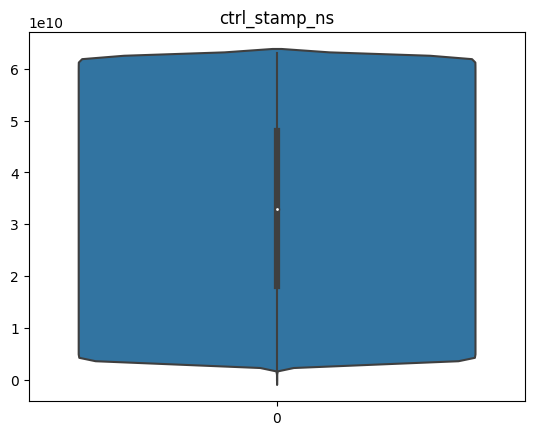

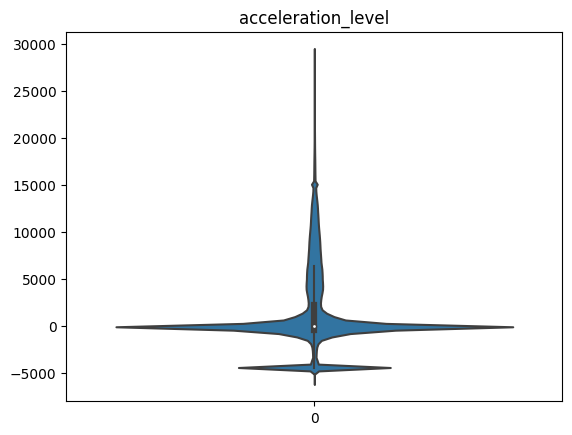

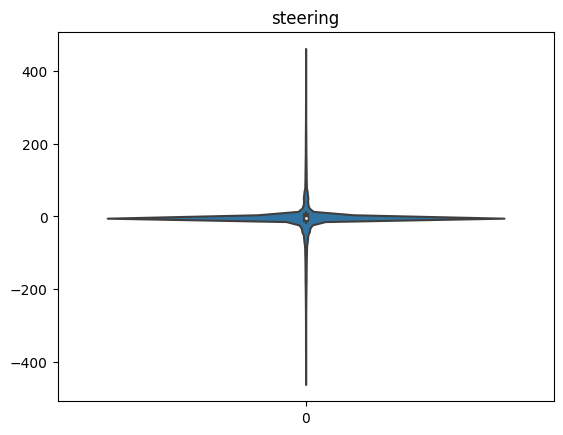

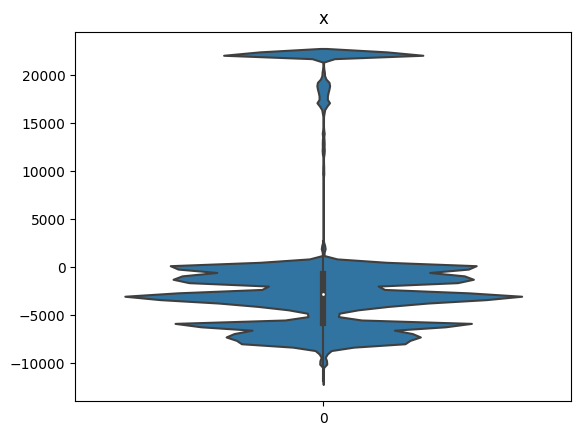

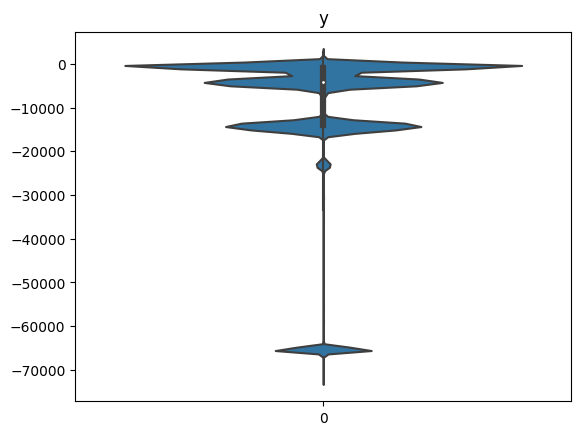

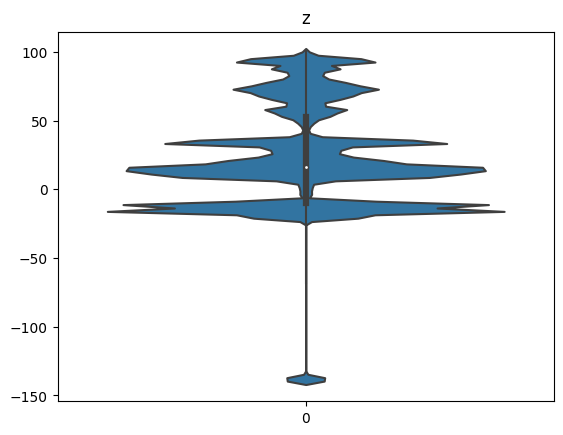

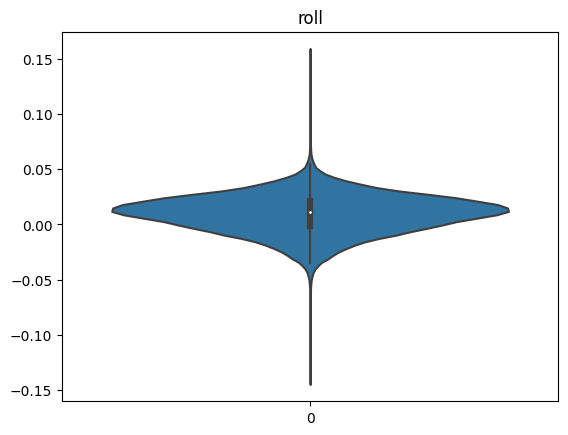

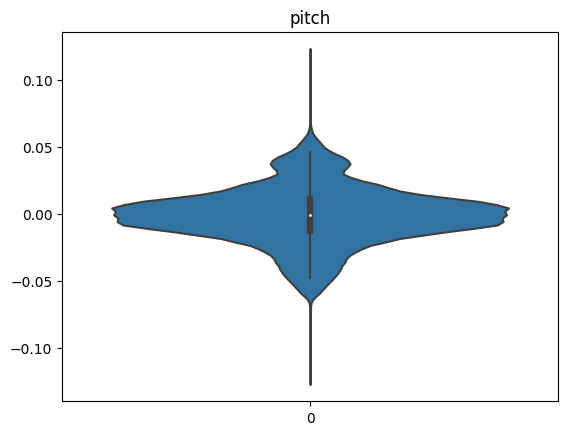

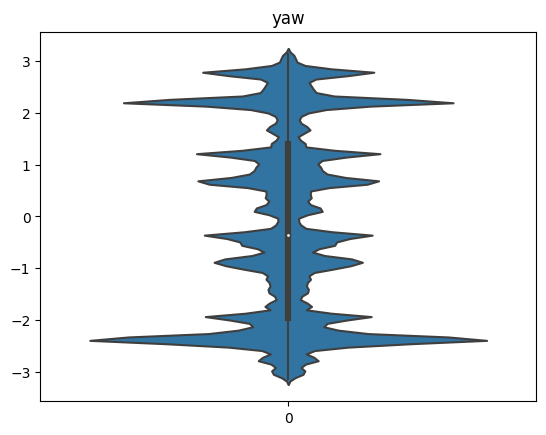

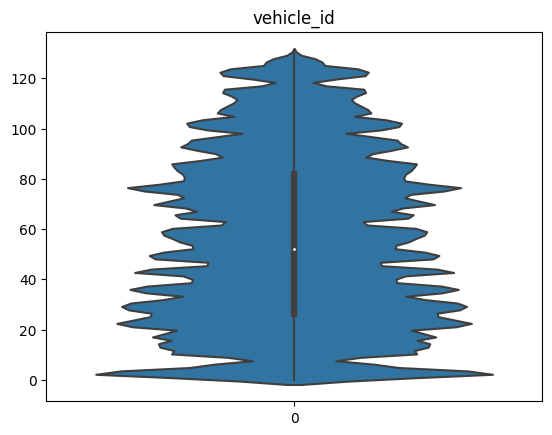

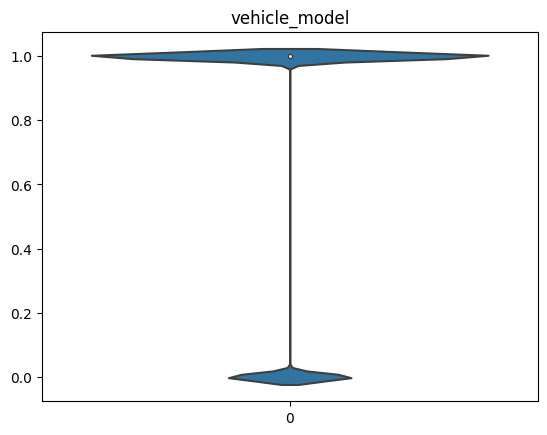

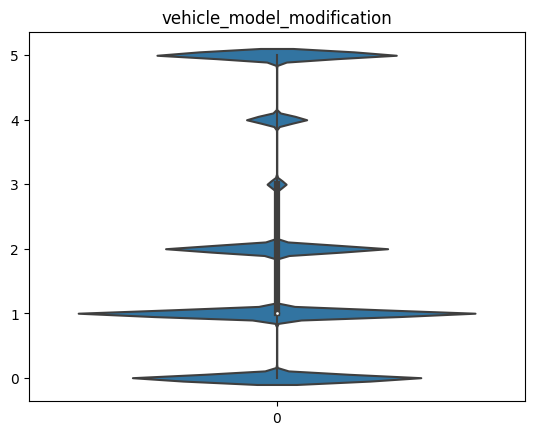

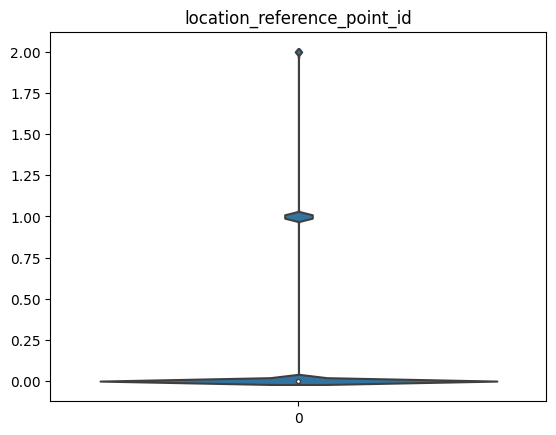

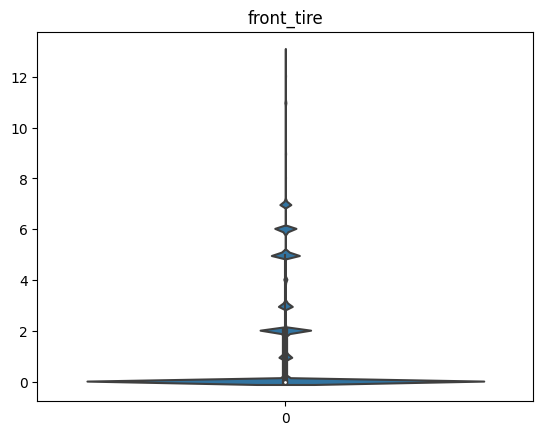

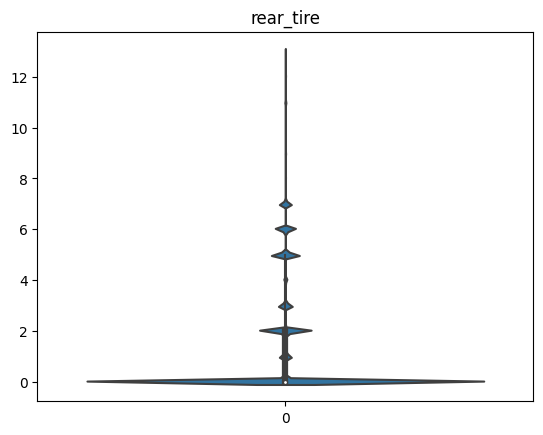

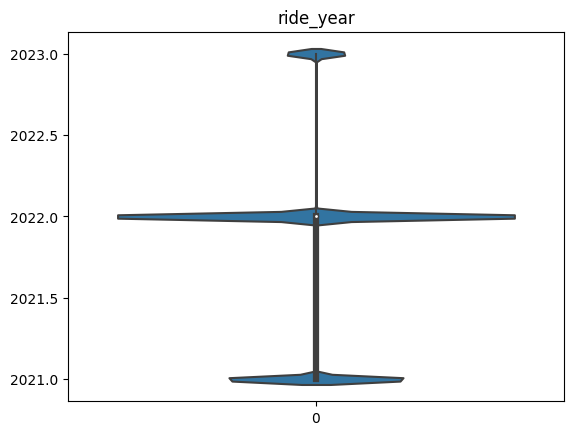

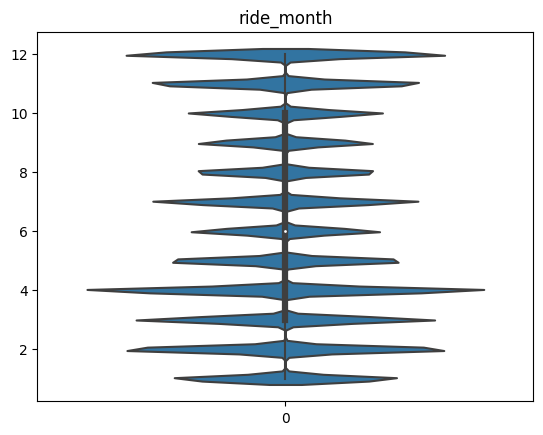

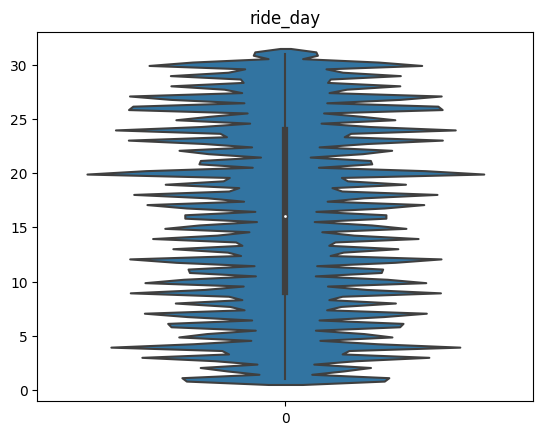

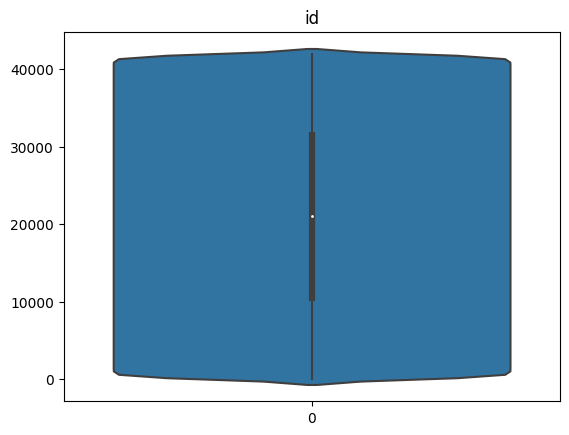

In [70]:
for col in train_data_clm.columns:
    # show only original columns
    if 'shift' not in col and 'last' not in col:
        sns.violinplot(data=train_data_clm[col])
        plt.title(col)
        plt.show()


### Find NaNs

In [5]:
train_data_clm.isnull().sum()

ctrl_stamp_ns                           0
acceleration_level                      0
steering                                0
x                                       3
y                                       3
z                                       3
roll                                    3
pitch                                   3
yaw                                     3
vehicle_id                              0
vehicle_model                           0
vehicle_model_modification              0
location_reference_point_id             0
front_tire                              0
rear_tire                               0
ride_year                               0
ride_month                              0
ride_day                                0
acceleration_level_shift_1          41999
acceleration_level_shift_2          83998
acceleration_level_shift_3         125997
steering_shift_1                    41999
steering_shift_2                    83998
steering_shift_3                  

In [6]:
# drop null from targets with ids 5647, 8726, 26513
train_data_clm.dropna(subset=['x', 'y', 'yaw'], axis=0, inplace=True)

# don't drop null from other columns for correct work PowerTransformer

In [7]:
# for big data on server
train_data_clm.to_parquet(f'{tmp_data_path}/train_trfd_big_wo_nan.parquet', index=False)

# # for small data on laptop
# train_data_clm.to_parquet(f'{tmp_data_path}/train_trfd_wo_nan.parquet', index=False)

## Train test split

In [2]:
# for big data on server
train_data_clm_wo_nan = pd.read_parquet(f'{tmp_data_path}/train_trfd_big_wo_nan.parquet')

# # for small data on laptop
# train_data_clm_wo_nan = pd.read_parquet(f'{tmp_data_path}/train_trfd_wo_nan.parquet')

train_data_clm_wo_nan.head()

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean,id
0,2995857096,103,-39.166992,-1485.943762,-960.351164,-13.010095,-0.007064,0.008307,-0.824868,1,0,0,0,0,0,2022,3,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,3035199935,100,-37.190053,-1485.726714,-960.578561,-13.011067,-0.005213,0.007878,-0.830047,1,0,0,0,0,0,2022,3,14,103.0,NaN,NaN,-39.166992,NaN,NaN,-1485.943762,NaN,NaN,-960.351164,NaN,NaN,-0.824868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,3075616856,97,-35.216312,-1485.508979,-960.816757,-13.013466,-0.005183,0.008100,-0.835117,1,0,0,0,0,0,2022,3,14,100.0,103.0,NaN,-37.190053,-39.166992,NaN,-1485.726714,-1485.943762,NaN,-960.578561,-960.351164,NaN,-0.830047,-0.824868,NaN,NaN,NaN,NaN,NaN,NaN,1
3,3114746707,94,-33.380729,-1485.294649,-961.045947,-13.019968,-0.003424,0.008908,-0.839693,1,0,0,0,0,0,2022,3,14,97.0,100.0,103.0,-35.216312,-37.190053,-39.166992,-1485.508979,-1485.726714,-1485.943762,-960.816757,-960.578561,-960.351164,-0.835117,-0.830047,-0.824868,NaN,NaN,NaN,NaN,NaN,1
4,3155548355,91,-31.542939,-1485.074911,-961.290768,-13.023563,-0.001832,0.009512,-0.844344,1,0,0,0,0,0,2022,3,14,94.0,97.0,100.0,-33.380729,-35.216312,-37.190053,-1485.294649,-1485.508979,-1485.726714,-961.045947,-960.816757,-960.578561,-0.839693,-0.835117,-0.830047,NaN,NaN,NaN,NaN,NaN,1


In [3]:
train_data_clm_wo_nan.shape

(62997550, 39)

In [4]:
def set_cols_for_model(train:pd.DataFrame, target:str=None):
    '''Set num and cat columns for model'''
    
    cols_checked = train.columns

    # target in [ ] because yaw hase more then one letter
    not_target = list(set(targets) - set([target]))


    # Set num columns
    control_cols = ['ctrl_stamp_ns', 'acceleration_level', 'steering']
    shift_cols = [col for col in cols_checked if '_shift' in col]
    tmp = [col for col in shift_cols for nt in not_target if f'{nt}_' in col]
    shift_cols = list(set(shift_cols) - set(tmp))

    last_10_cols = [col for col in cols_checked if 'last_10' in col]
    tmp = [col for col in last_10_cols for nt in not_target if f'{nt}_' in col]
    last_10_cols = list(set(last_10_cols) - set(tmp))

    num_cols = control_cols + shift_cols + last_10_cols

    # Set categorical columns
    cols_temp = [col for col in cols_checked if col in control_cols or 'last' in col or 'shift' in col or 'diff' in col]
    cat_cols = list(set(cols_checked) - set(cols_temp) - set(targets))


    return cat_cols, num_cols

# train test split
def train_get(df):
    train, valid = train_test_split(df, test_size=0.2, random_state=RAND_ST, shuffle=False)
    return train

def valid_get(df):
    train, valid = train_test_split(df, test_size=0.2, random_state=RAND_ST, shuffle=False)
    return valid

In [5]:
def train_valid_get(train:pd.DataFrame) -> None:
    '''Encode categorical columns with CatBoostEncoder
    Split train dataframe to train and valid dataframes for each target and save to parquet. '''
    for target in targets:
        # drop unnecessary columns
        train_target = train.drop(columns=['z', 'roll', 'pitch'])

        # set columns for one target
        cat_cols, num_cols = set_cols_for_model(train_target, target)
       
        # use only columns for one target
        train_target = train_target.loc[:, cat_cols + num_cols]

        # fill null in target_shift column for correct work CatBoostEncoder
        train_target.fillna(value={f'{target}_shift_1': -1}, inplace=True)

        # encode categorical columns and save to parquet
        train_target = ce.cat_boost.CatBoostEncoder(cols=cat_cols).fit_transform(train_target, train_target[f'{target}_shift_1'])
        train_target['id_obs'] = train['id']

        # del num and reminder from col names
        # train_target.columns = [col.split("__")[1] if "__" in col else col for col in train_target.columns]

        # replace -1 to nan
        train_target[f'{target}_shift_1'].replace(-1, np.nan, inplace=True)


        # add target column to the end
        train_target[target] = train[target]
        
        train_target.groupby('id_obs').apply(train_get).to_parquet(f'{tmp_data_path}/train_ctb_{target}.parquet', index=False)
        train_target.groupby('id_obs').apply(valid_get).to_parquet(f'{tmp_data_path}/valid_ctb_{target}.parquet', index=False)
        print(f'target={target} encoded and saved to parquet')


In [6]:
targets = ['x', 'y', 'yaw']
train_valid_get(train_data_clm_wo_nan)

target=x encoded and saved to parquet
target=y encoded and saved to parquet
target=yaw encoded and saved to parquet


In [17]:
pd.read_parquet(f'{tmp_data_path}/train_ctb_{target}.parquet').head()

,rear_tire,vehicle_id,ride_month,front_tire,location_reference_point_id,vehicle_model,ride_day,id,ride_year,vehicle_model_modification,ctrl_stamp_ns,acceleration_level,steering,steering_shift_3,x_shift_2,steering_shift_2,x_shift_1,acceleration_level_shift_1,steering_shift_1,acceleration_level_shift_3,x_shift_3,acceleration_level_shift_2,acceleration_level_last_10_mean,x_last_10_mean,steering_last_10_mean,id_obs,x
0,-2695.734397,-2695.734397,-2695.734397,-2695.734397,-2695.734397,-2695.734397,-2695.734397,-2695.734397,-2695.734397,-2695.734397,2987440736,-114,-2.655140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-4305.325027
1,-1348.367199,-1348.367199,-1348.367199,-1348.367199,-1348.367199,-1348.367199,-1348.367199,-1348.367199,-1348.367199,-1348.367199,3027341070,-123,-2.598169,NaN,NaN,NaN,-4305.325027,-114.0,-2.655140,NaN,NaN,NaN,NaN,NaN,NaN,0,-4305.489155
2,-2334.019808,-2334.019808,-2334.019808,-2334.019808,-2334.019808,-2334.019808,-2334.019808,-2334.019808,-2334.019808,-2334.019808,3066793076,-132,-2.544422,NaN,-4305.325027,-2.655140,-4305.489155,-123.0,-2.598169,NaN,NaN,-114.0,NaN,NaN,NaN,0,-4305.652097
3,-2826.887145,-2826.887145,-2826.887145,-2826.887145,-2826.887145,-2826.887145,-2826.887145,-2826.887145,-2826.887145,-2826.887145,3106757146,-141,-2.544422,-2.655140,-4305.489155,-2.598169,-4305.652097,-132.0,-2.544422,-114.0,-4305.325027,-123.0,NaN,NaN,NaN,0,-4305.815555
4,-3122.640135,-3122.640135,-3122.640135,-3122.640135,-3122.640135,-3122.640135,-3122.640135,-3122.640135,-3122.640135,-3122.640135,3146784622,-147,-2.488557,-2.598169,-4305.652097,-2.544422,-4305.815555,-141.0,-2.544422,-123.0,-4305.489155,-132.0,NaN,NaN,NaN,0,-4305.979063


## Make pipeline for each target

### Pipe for models

#### Preprocessed data for model

In [7]:
def preprocessed_trva(train:pd.DataFrame, valid:pd.DataFrame, target:str):
    '''Preprocess train and valid data for model
    cat_cols encoded with CatBoostEncoder
    num_cols transformed with PowerTransformer
    '''

    # set cols for model with targets
    cat_cols, num_cols = set_cols_for_model(train, target)

    # set categorical columns without targets
    # cat_cols = [col for col in cat_cols if col not in targets]

    # # set cols for model with one target
    # cols_for_model = [col for col in cat_cols + num_cols if col not in targets]
    


    # add col target - shift_1 and fillna 0
    train[f'{target}_diff'] = train[f'{target}'] - train[f'{target}_shift_1']
    train.fillna(value={f'{target}_diff':0}, inplace=True) 
    valid[f'{target}_diff'] = valid[f'{target}'] - valid[f'{target}_shift_1']
    valid.fillna(value={f'{target}_diff':0}, inplace=True)

    # # Select data with columns for the model
    # train_for_model = train[cols_for_model]
    # valid_for_model = valid[cols_for_model]

    # Encode categorical columns separately with TargetEncoder
    # cat_encoder = ce.cat_boost.CatBoostEncoder()
    # # drop target columns from train_features_targets_for_model for correct fit
    # train_encoded = cat_encoder.fit_transform(train_for_model.drop(columns=[f'{target}']), train_for_model[target])
    # # valid_features_prepr = cat_encoder.transform(valid_features_for_model)
    # valid_encoded = cat_encoder.transform(valid_for_model.drop(columns=[f'{target}']))

     
    # Preprocessor for numerical features
    num_transformer = skl_pipeline(
        # std=False because trees algorithms don't need scaling
        steps=[('power', PowerTransformer())]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols)
            # for cat_boost must use cols if not use it is not encode
            # ,('cat', ce.cat_boost.CatBoostEncoder(cols=cat_cols), cat_cols)
            # ,('cat', OrdinalEncoder(), cat_cols)
        ],
        remainder='passthrough'
    )

    
    # Preprocess the encoded training and test data
    train_prepr = preprocessor.fit_transform(train[cat_cols + num_cols])
    # valid_features_prepr = preprocessor.transform(valid_features_encoded)
    valid_prepr = preprocessor.transform(valid[cat_cols + num_cols])


    # del num and reminder from col names
    train_prepr.columns = [col.split("__")[1] if "__" in col else col for col in train_prepr.columns]
    valid_prepr.columns = [col.split("__")[1] if "__" in col else col for col in valid_prepr.columns]

   
    # # add target columns to preprocessed data
    # train_prepr[f'{target}'] = train[target]
    # valid_prepr[f'{target}'] = valid[target]

    # add diff target columns to preprocessed data
    train_prepr[f'{target}_diff'] = train[f'{target}_diff']
    valid_prepr[f'{target}_diff'] = valid[f'{target}_diff']

    # add obs shift_1 column to preprocessed data
    train_prepr[f'{target}_shift_1_obs'] = train[f'{target}_shift_1']
    valid_prepr[f'{target}_shift_1_obs'] = valid[f'{target}_shift_1']

    # replace null values with -100 for correct work of VectorAssembler. -100 is out of range after preprocessing by PowerTransformer
    train_prepr.fillna(-100, inplace=True)
    valid_prepr.fillna(-100, inplace=True)



    # add target column to preprocessed data
    train_prepr[target] = train[target]
    valid_prepr[target] = valid[target]
    

    # # add id columns to preprocessed data
    # train_prepr['id_obs'] = train['id']
    # valid_prepr['id_obs'] = valid['id']

  
    return train_prepr, valid_prepr, preprocessor

In [8]:
def save_prepr_data(train:pd.DataFrame, valid:pd.DataFrame, target:str):
    '''Save preprocessed data for model'''

    # Preprocess data for model
    train_prepr, valid_prepr, preprocessor = preprocessed_trva(
        train
        ,valid
        ,target
    )
     
    # save preprocessed data
    train_prepr.to_parquet(f'{tmp_data_path}/train_prepr_{target}.parquet', index=False)
    valid_prepr.to_parquet(f'{tmp_data_path}/valid_prepr_{target}.parquet', index=False)

    # save preprocessor and cat_encoder in pkl
    pd.to_pickle(preprocessor, f'{tmp_data_path}/preprocessor_{target}.pkl')
    # pd.to_pickle(cat_encoder, f'{tmp_data_path}/cat_encoder_{target}.pkl')
    print(f'save train and valid for target {target} complited')

In [ ]:
targets = ['x', 'y', 'yaw']

for target in targets:
    train = pd.read_parquet(f'{tmp_data_path}/train_ctb_{target}.parquet')
    valid = pd.read_parquet(f'{tmp_data_path}/valid_ctb_{target}.parquet')
    save_prepr_data(train, valid, target)

save train and valid for target x complited


### Train models with spark data

#### Create functions for train models

In [25]:
target = 'x'
train = spark.read.parquet(f'{tmp_data_path}/train_prepr_{target}.parquet')
train.show()

+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------------+--------------------+--------------------------+-------------------+--------------------------+-------------------------------+-------------------+---------------------+-------------------+-------------------+-------------------+-------------------+---------------------------+-------------------+------+-------------------+-------------------+-------------------+--------------------------+--------------------+-------------------+-------------------+
|      ctrl_stamp_ns|  acceleration_level|            steering|    steering_shift_3|          x_shift_2|    steering_shift_2|          x_shift_1|acceleration_level_shift_1|    steering_shift_1|acceleration_level_shift_3|          x_shift_3|acceleration_level_shift_2|acceleration_level_last_10_mean|     x_last_10_mean|steering_last_10_mean|          rear_tire|         vehic

In [27]:
def pipeline_fit_model(train:SparkDataFrame, target:str, params:dict, model):
    '''Create a pipeline with model and fit it to the train data'''
    features_cols = train.drop(target, f'{target}_diff').columns
    
    # VectorAssembler is used to combine all transformed features into a single feature vector required by Spark MLlib for model training.
    # Assemble all features into a single vector
    assembler = spk_VectorAssembler(
        inputCols=features_cols,
        outputCol="features"
    )

    # try to use VectorAssembler for all train data, not for one target
    
    return spk_pipeline(stages=[assembler, model(**params)]).fit(train)

In [35]:
target = 'x'
train = spark.read.parquet(f'{tmp_data_path}/train_prepr_{target}.parquet')
valid = spark.read.parquet(f'{tmp_data_path}/valid_prepr_{target}.parquet')

model = LightGBMRegressor_spark
# model = CatBoostRegressor_spark

params = {}

g_params = {
            'labelCol': f'{target}_diff'
            # ,'seed': RAND_ST
        }


params.update(g_params)


model_tuned = pipeline_fit_model(train, target, params, model)
    
# Generate predictions for target_diff
predictions_valid = model_tuned.transform(valid)

# drop rows 'shift_1_obs' with -100 and add target prediction
predictions_valid = predictions_valid.filter(F.col(f'{target}_shift_1_obs') != -100) \
    .withColumn(f'{target}_pred', F.col('prediction') + F.col(f'{target}_shift_1_obs')) \

mape = predictions_valid.withColumn('mape', F.abs((F.col(f'{target}_pred') - F.col(target)) / F.col(target)) * 100)
print(f"valid {mape.select(F.mean('mape').alias('mape')).collect()[0]['mape']}")

predictions_train = model_tuned.transform(train)

# drop rows 'shift_1_obs' with -100 and add target prediction
predictions_train = predictions_train.filter(F.col(f'{target}_shift_1_obs') != -100) \
    .withColumn(f'{target}_pred', F.col('prediction') + F.col(f'{target}_shift_1_obs')) \

mape_2 = predictions_train.withColumn('mape', F.abs((F.col(f'{target}_pred') - F.col(target)) / F.col(target)) * 100)
print(f"train {mape_2.select(F.mean('mape').alias('mape')).collect()[0]['mape']}")


[LightGBM] [Info] Saving data reference to binary buffer


24/12/12 18:59:22 WARN StreamingPartitionTask: LightGBM task encountered empty partition, for best performance ensure no partitions are empty


[LightGBM] [Info] Loaded reference dataset: 27 features, 24000 num_data


valid 0.0217303306270944
train 0.005489568221696154


In [78]:
predictions_2.show(1000)

+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------------+--------------------------+--------------------+-------------------+--------------------------+--------------------+-------------------+-------------------+---------------------+-------------------------------+----------+---------------------------+--------------------------+----------+----------+---------+---+---------+--------+-------------+-------------------+--------------------+------+--------------------+--------------------+
|       ctrl_stamp_ns|  acceleration_level|            steering|    steering_shift_2|          x_shift_2|acceleration_level_shift_1|acceleration_level_shift_3|    steering_shift_1|          x_shift_1|acceleration_level_shift_2|    steering_shift_3|          x_shift_3|     x_last_10_mean|steering_last_10_mean|acceleration_level_last_10_mean|vehicle_id|location_reference_point_id|vehicle_model_modification|front_tire|ride_month|re

In [61]:
train.toPandas().describe()

,ctrl_stamp_ns,acceleration_level,steering,steering_shift_2,x_shift_2,acceleration_level_shift_1,acceleration_level_shift_3,steering_shift_1,x_shift_1,acceleration_level_shift_2,steering_shift_3,x_shift_3,x_last_10_mean,steering_last_10_mean,acceleration_level_last_10_mean,vehicle_id,location_reference_point_id,vehicle_model_modification,front_tire,ride_month,rear_tire,id,ride_year,ride_day,vehicle_model,x,x_diff,id_obs
count,2.400000e+04,2.400000e+04,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,9.710751e-17,1.136868e-16,1.894781e-17,-0.166667,-0.166667,-0.083333,-0.250000,-0.083333,-0.083333,-0.166667,-0.250000,-0.250000,-0.750000,-0.750000,-0.750000,-2480.987686,-2645.934243,-2369.305481,-2485.087715,-2838.848239,-2485.087715,-2675.101058,-2838.848239,-2751.745333,-2571.075890,-2692.241392,-0.051728,9.500000
std,1.000021e+00,1.000021e+00,1.000021e+00,4.199757,4.199757,3.053841,5.092748,3.053841,3.053841,4.199757,5.092748,5.092748,8.685226,8.685226,8.685226,2549.222345,1211.980530,1625.070479,648.632342,713.036979,648.632342,2661.484586,713.036979,1385.379690,759.656388,2675.879278,0.265915,5.766401
min,-1.968900e+00,-2.248792e+00,-7.342827e+00,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-8452.972453,-4357.441547,-7350.818938,-4357.441547,-4357.441547,-4357.441547,-8452.972453,-4357.441547,-5893.614466,-4357.441547,-8482.957823,-0.592382,0.000000
25%,-8.190097e-01,1.677620e-02,-7.940183e-02,-0.079194,-0.688268,0.016179,0.014090,-0.079296,-0.687932,0.015026,-0.079098,-0.688630,-0.691174,-0.078943,0.009788,-4205.570618,-3231.732830,-2884.228382,-2790.470788,-3296.401747,-2790.470788,-4300.160646,-3296.401747,-3978.210859,-3084.549205,-4384.252135,-0.232348,4.750000
50%,7.643325e-02,8.293804e-02,3.980723e-03,0.003962,0.272048,0.082785,0.082469,0.003974,0.272184,0.082629,0.003752,0.271900,0.270962,0.003288,0.081595,-1433.717790,-3013.901876,-2336.399741,-2491.904709,-2893.638528,-2491.904709,-1441.963882,-2893.638528,-2490.987486,-2525.641918,-1438.446244,-0.050926,9.500000
75%,8.684499e-01,1.018932e-01,8.049276e-02,0.080413,0.690170,0.101739,0.101420,0.080425,0.690177,0.101581,0.080396,0.690162,0.690260,0.080375,0.100580,-376.022759,-2708.690501,-1416.828543,-2065.469672,-2490.899884,-2065.469672,-396.479159,-2490.899884,-1460.351551,-2052.122469,-397.190298,0.053776,14.250000
max,1.597235e+00,3.794812e+00,6.532909e+00,6.531601,2.887046,3.794035,3.792567,6.532318,2.887656,3.793280,6.530774,2.886437,2.882495,6.504097,3.786884,513.989239,182.498717,94.424303,-1352.274832,-1227.367832,-1352.274832,513.989239,-1227.367832,-950.816353,-1179.178324,563.685960,0.644054,19.000000


In [79]:
predictions.show(1000)

+------------------+-------------------+--------------------+--------------------+-------------------+--------------------------+--------------------------+--------------------+-------------------+--------------------------+--------------------+-------------------+-------------------+---------------------+-------------------------------+----------+---------------------------+--------------------------+----------+----------+---------+---+---------+--------+-------------+-------------------+--------------------+------+--------------------+--------------------+
|     ctrl_stamp_ns| acceleration_level|            steering|    steering_shift_2|          x_shift_2|acceleration_level_shift_1|acceleration_level_shift_3|    steering_shift_1|          x_shift_1|acceleration_level_shift_2|    steering_shift_3|          x_shift_3|     x_last_10_mean|steering_last_10_mean|acceleration_level_last_10_mean|vehicle_id|location_reference_point_id|vehicle_model_modification|front_tire|ride_month|rear_tir

<Axes: xlabel='importance', ylabel='feature'>

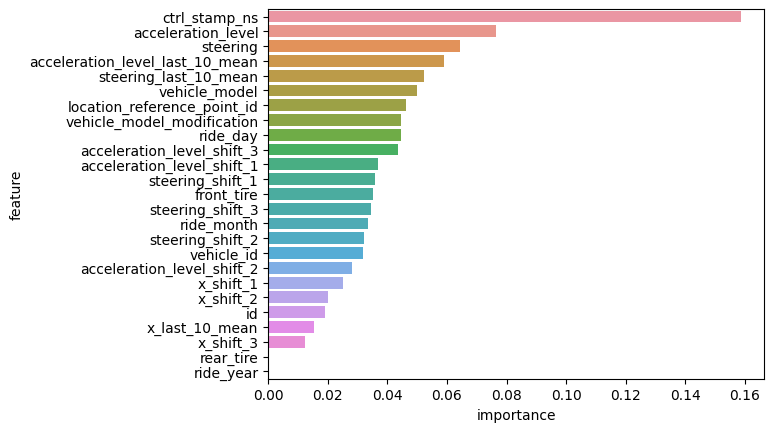

In [35]:
fi = pd.Series(model_tuned.stages[-1].getFeatureImportances())
# Normalize feature importances
feature_importances = [i / fi.sum() for i in fi]
# add feature names
features_cols = train.drop(target, f'{target}_diff').columns
feature_importances = pd.DataFrame(
    list(zip(features_cols, feature_importances)),
    columns=["feature", "importance"]
)
# sort by importance
feature_importances = feature_importances.sort_values(by="importance", ascending=False)
feature_importances.to_csv(f'{tmp_path}/feature_importances_{target}.csv')

sns.barplot(x=feature_importances['importance'], y=feature_importances['feature'])

In [36]:
def enter_t(t, model):
    '''Enter hyperparameters for model'''
    if model == LightGBMRegressor_spark:
        return {
            'learningRate': t.suggest_float('learningRate', 0.01, 0.3)
            ,'numIterations': t.suggest_int('numIterations', 100, 200)
            ,'numLeaves': t.suggest_int('numLeaves', 2, 1000)
            ,'maxDepth': t.suggest_int('maxDepth', 2, 100)
        }
    elif model == CatBoostRegressor_spark:
        return {
        'learningRate': t.suggest_float('learningRate', 0.01, 0.3)
        ,'numIterations': t.suggest_int('numIterations', 100, 200)
        ,'depth': t.suggest_int('depth', 2, 10)
        }
    # raise and exception if model is not defined
    else:
        raise ValueError('Models LightGBMRegressor_spark and CatBoostRegressor_spark are not defined')

In [37]:
def hyper_opt(t) -> float:
    '''Hyperparameter optimization for LightGBM model'''
    # Define spark LightGBM parameters for optuna

    # params = {
    #     'learningRate': t.suggest_float('learningRate', 0.01, 0.3)
    #     ,'numIterations': t.suggest_int('numIterations', 100, 200)
    #     ,'numLeaves': t.suggest_int('numLeaves', 2, 100)
    #     ,'maxDepth': t.suggest_int('maxDepth', 2, 100)
    #     # ,'minChildWeight': t.suggest_float('minChildWeight', 0.1, 10)
    #     # ,'subsample': t.suggest_float('subsample', 0.1, 1)
    #     # ,'colsampleByTree': t.suggest_float('colsampleByTree', 0.1, 1)
    #     # ,'regAlpha': t.suggest_float('regAlpha', 0.1, 10)
    #     # ,'regLambda': t.suggest_float('regLambda', 0.1, 10)
    # }


    # Define model parameters for optuna
    params = enter_t(t, model)

    # add global params to params
    params.update(g_params)


    # Fit the model to the training data in the pipeline (assuming you have a pre-defined pipeline)
    model_tuned = pipeline_fit_model(train, target, params, model)
    
    # Generate predictions for target_diff
    predictions = model_tuned.transform(valid)

    # drop rows 'shift_1_obs' with -100 and add target prediction
    predictions = predictions.filter(F.col(f'{target}_shift_1_obs') != -100) \
        .withColumn(f'{target}_pred', F.col('prediction') + F.col(f'{target}_shift_1_obs')) \

    mape = predictions.withColumn('mape', F.abs((F.col(f'{target}_pred') - F.col(target)) / F.col(target)) * 100) \
        .select(F.mean('mape').alias('mape')).collect()[0]['mape']
 
    return mape

In [ ]:
# rewrite for rel err
def best_model_to_mlflow(predictions:SparkDataFrame, model, target:str, params:dict, features_cols) -> None:
    '''Log the best model with metrics to MLflow

        Parameters:
        predictions (SparkDataFrame): Spark DataFrame with predictions and target values.
        spark_lgbmr (Spark Model): The Spark model object to log.
        target (str): The name of the target column.
    '''

    # drop rows 'shift_1_obs' with -100 and add target prediction
    predictions = predictions.filter(F.col(f'{target}_shift_1_obs') != -100) \
        .withColumn(f'{target}_pred', F.col('prediction') + F.col(f'{target}_shift_1_obs')) \

    predictions = predictions.withColumn('rel_err_abs', F.abs((F.col(f'{target}_pred') - F.col(target)) / F.col(target)) * 100) \
        .withColumn('rel_err', (F.col(f'{target}') - F.col(f'{target}_pred')) / F.col(f'{target}') * 100) 
 

    # Save predictions with errors to parquet
    pred_rel_err = predictions.select('id_obs', f'{target}', f'{target}_pred', 'rel_err', 'rel_err_abs').toPandas()
    pred_rel_err.to_parquet(f'{tmp_path}/pred_rel_err_{target}.parquet', index=False)
    
    # Calculate metrics   
    mae = mean_absolute_error(pred_rel_err[f'{target}'], pred_rel_err[f'{target}_pred'])
    mse = mean_squared_error(pred_rel_err[f'{target}'], pred_rel_err[f'{target}_pred'])
    rel_err = pred_rel_err['rel_err']
    
    metrics = {
        'mae': mae,
        'mse': mse,
        'mape': rel_err.abs().mean(),
        'rel_err_median': rel_err.median(),
        'rel_err_mean': rel_err.mean()
        
    }

    # Visualize and save error distributions
    pd_tools.plot_hist_mm_lines(rel_err, f'Relative error for {target}', '%')
    plt.savefig(f'{tmp_path}/rel_err_hist_{target}.png')
    plt.clf()

    sns.boxenplot(data=rel_err)
    plt.title(f'Relative error for {target}')
    plt.tight_layout()
    plt.savefig(f'{tmp_path}/rel_err_boxnp_{target}.png')
    plt.clf()

    
    # Get feature importance
    spark_tools.get_f_imp_spark(model, features_cols, target, f'{tmp_path}')
  
     
    # Log the model, params and metrics to MLflow
    with mlflow.start_run(run_name=f'{target}_{dt.now(EXP_TIMEZONE).strftime("%Y-%m-%d %H:%M:%S")}'):
        # Log the model
        mlflow.spark.log_model(model, f'{target}_model')
        # Log the hyperparameters
        mlflow.log_params(params)
        # Log the metrics
        mlflow.log_metrics(metrics)
        # Log the artifacts
        mlflow.log_artifact(f'{tmp_path}/pred_rel_err_{target}.parquet')
        mlflow.log_artifact(f'{tmp_path}/rel_err_hist_{target}.png')
        mlflow.log_artifact(f'{tmp_path}/rel_err_boxnp_{target}.png')
        mlflow.log_artifact(f'{tmp_path}/feature_importances_{target}.csv')
        mlflow.log_artifact(f'{tmp_path}/feature_importances_{target}.png')
    
    # Wait before starting the next experiment
    # sleep(120)

    return None

In [39]:
mlflow.set_experiment('temp')

<Experiment: artifact_location='/app/mlruns/796452440618918620', creation_time=1733423156422, experiment_id='796452440618918620', last_update_time=1733423156422, lifecycle_stage='active', name='temp', tags={}>

In [40]:
targets = ['x', 'y', 'yaw']
# train_targets = spark.read.parquet(f'{tmp_data_path}/train_targets.parquet')
# valid_targets = spark.read.parquet(f'{tmp_data_path}/valid_targets.parquet')

models = [LightGBMRegressor_spark, CatBoostRegressor_spark]

# for lgbm only if set models[:1]
for m in models[:1]:
    for target in targets:
        # copy model for each target
        model = deepcopy(m)
        mlflow.set_experiment(f'self_drive_target_{target}')
        print(f'Experiment: {target}')
        # read preprocessed train data for target

        train = spark.read.parquet(f'{tmp_data_path}/train_prepr_{target}.parquet')
        valid = spark.read.parquet(f'{tmp_data_path}/valid_prepr_{target}.parquet')
        

        # set global params for model
        g_params = {
                'labelCol': f'{target}_diff'
                ,'seed': RAND_ST
        }

        try:
            study = optuna.create_study(direction='minimize', study_name='hyperopt') # or 'minimize' maximize
            study.optimize(hyper_opt, n_trials=2)
        except KeyboardInterrupt:
            print("Optimization interrupted by user.")
            # fit and save model to mlflow

        # add global params to best params
        params = study.best_params

        params.update(g_params)

        print(f'Best params: {params}') 

        model = pipeline_fit_model(train, target, params, model)

        predictions = model.transform(valid)

        features_cols = train.drop(f'{target}').columns

        # best_model_to_mlflow(predictions, model, target, params, features_cols)
        



Experiment: x


[I 2024-12-12 19:02:54,514] A new study created in memory with name: hyperopt


[LightGBM] [Info] Saving data reference to binary buffer


24/12/12 19:02:57 WARN StreamingPartitionTask: LightGBM task encountered empty partition, for best performance ensure no partitions are empty


[LightGBM] [Info] Loaded reference dataset: 27 features, 24000 num_data


24/12/12 19:06:04 WARN DAGScheduler: Broadcasting large task binary with size 8.9 MiB
[I 2024-12-12 19:06:05,839] Trial 0 finished with value: 0.01850053185453399 and parameters: {'learningRate': 0.10772903590589296, 'numIterations': 154, 'numLeaves': 770, 'maxDepth': 82}. Best is trial 0 with value: 0.01850053185453399.


[LightGBM] [Info] Saving data reference to binary buffer


24/12/12 19:06:08 WARN StreamingPartitionTask: LightGBM task encountered empty partition, for best performance ensure no partitions are empty


[LightGBM] [Info] Loaded reference dataset: 27 features, 24000 num_data


24/12/12 19:07:15 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
[I 2024-12-12 19:07:16,003] Trial 1 finished with value: 0.018738445546375576 and parameters: {'learningRate': 0.12506913845839276, 'numIterations': 124, 'numLeaves': 262, 'maxDepth': 94}. Best is trial 0 with value: 0.01850053185453399.


Best params: {'learningRate': 0.10772903590589296, 'numIterations': 154, 'numLeaves': 770, 'maxDepth': 82, 'labelCol': 'x_diff', 'seed': 354}
[LightGBM] [Info] Saving data reference to binary buffer


24/12/12 19:07:19 WARN StreamingPartitionTask: LightGBM task encountered empty partition, for best performance ensure no partitions are empty


[LightGBM] [Info] Loaded reference dataset: 27 features, 24000 num_data


Experiment: y


[I 2024-12-12 19:10:20,877] A new study created in memory with name: hyperopt


[LightGBM] [Info] Saving data reference to binary buffer


24/12/12 19:10:23 WARN StreamingPartitionTask: LightGBM task encountered empty partition, for best performance ensure no partitions are empty


[LightGBM] [Info] Loaded reference dataset: 27 features, 24000 num_data


24/12/12 19:13:58 WARN DAGScheduler: Broadcasting large task binary with size 10.3 MiB
[I 2024-12-12 19:13:59,173] Trial 0 finished with value: 0.02031878319939342 and parameters: {'learningRate': 0.10844781497964971, 'numIterations': 166, 'numLeaves': 813, 'maxDepth': 96}. Best is trial 0 with value: 0.02031878319939342.


[LightGBM] [Info] Saving data reference to binary buffer


24/12/12 19:14:01 WARN StreamingPartitionTask: LightGBM task encountered empty partition, for best performance ensure no partitions are empty


[LightGBM] [Info] Loaded reference dataset: 27 features, 24000 num_data


24/12/12 19:15:45 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB
[I 2024-12-12 19:15:46,475] Trial 1 finished with value: 0.020880717053533112 and parameters: {'learningRate': 0.02210586708217424, 'numIterations': 155, 'numLeaves': 381, 'maxDepth': 25}. Best is trial 0 with value: 0.02031878319939342.


Best params: {'learningRate': 0.10844781497964971, 'numIterations': 166, 'numLeaves': 813, 'maxDepth': 96, 'labelCol': 'y_diff', 'seed': 354}
[LightGBM] [Info] Saving data reference to binary buffer


24/12/12 19:15:48 WARN StreamingPartitionTask: LightGBM task encountered empty partition, for best performance ensure no partitions are empty


[LightGBM] [Info] Loaded reference dataset: 27 features, 24000 num_data


Experiment: yaw


[I 2024-12-12 19:18:29,252] A new study created in memory with name: hyperopt


[LightGBM] [Info] Saving data reference to binary buffer


24/12/12 19:18:30 WARN StreamingPartitionTask: LightGBM task encountered empty partition, for best performance ensure no partitions are empty


[LightGBM] [Info] Loaded reference dataset: 27 features, 24000 num_data


[I 2024-12-12 19:18:45,854] Trial 0 finished with value: 2.1240873353840732 and parameters: {'learningRate': 0.06280554743135515, 'numIterations': 172, 'numLeaves': 57, 'maxDepth': 71}. Best is trial 0 with value: 2.1240873353840732.


[LightGBM] [Info] Saving data reference to binary buffer


24/12/12 19:18:47 WARN StreamingPartitionTask: LightGBM task encountered empty partition, for best performance ensure no partitions are empty


[LightGBM] [Info] Loaded reference dataset: 27 features, 24000 num_data


24/12/12 19:20:06 WARN DAGScheduler: Broadcasting large task binary with size 5.3 MiB
[I 2024-12-12 19:20:06,873] Trial 1 finished with value: 2.03879685092269 and parameters: {'learningRate': 0.23782813152735596, 'numIterations': 108, 'numLeaves': 578, 'maxDepth': 100}. Best is trial 1 with value: 2.03879685092269.


Best params: {'learningRate': 0.23782813152735596, 'numIterations': 108, 'numLeaves': 578, 'maxDepth': 100, 'labelCol': 'yaw_diff', 'seed': 354}
[LightGBM] [Info] Saving data reference to binary buffer


24/12/12 19:20:08 WARN StreamingPartitionTask: LightGBM task encountered empty partition, for best performance ensure no partitions are empty


[LightGBM] [Info] Loaded reference dataset: 27 features, 24000 num_data


## Test data predict

In [113]:
test_ids = pd.Series(read_names(test_data_path)).apply(int).sort_values().reset_index(drop=True)
test_ids

0          0
1          1
2          2
3          3
4          4
        ... 
7995    7995
7996    7996
7997    7997
7998    7998
7999    7999
Length: 8000, dtype: int64

In [114]:
ids = test_ids[:20]
files = ['control.csv', 'localization.csv', 'metadata.json']
test_data_clm = make_df_all_ids(test_data_path, ids, files)
test_data_clm.head()

id=0


,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean,id
0,36479492,-929,5.739836,-1482.652683,-1321.883377,-16.014848,0.027502,-0.001965,2.240336,83,1,1,0,0,0,2021,9,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,76459951,-926,5.280618,-1482.766060,-1321.739986,-16.013856,0.027058,-0.001575,2.241208,83,1,1,0,0,0,2021,9,6,-929.0,NaN,NaN,5.739836,NaN,NaN,-1482.652683,NaN,NaN,-1321.883377,NaN,NaN,2.240336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,116678417,-918,5.039505,-1482.878275,-1321.598782,-16.010625,0.027793,-0.001459,2.242181,83,1,1,0,0,0,2021,9,6,-926.0,-929.0,NaN,5.280618,5.739836,NaN,-1482.766060,-1482.652683,NaN,-1321.739986,-1321.883377,NaN,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN,NaN,0
3,156788958,-908,4.734873,-1482.990024,-1321.458284,-16.010063,0.027618,-0.001372,2.243131,83,1,1,0,0,0,2021,9,6,-918.0,-926.0,-929.0,5.039505,5.280618,5.739836,-1482.878275,-1482.766060,-1482.652683,-1321.598782,-1321.739986,-1321.883377,2.242181,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN,0
4,196857808,-897,4.387096,-1483.100935,-1321.319090,-16.009805,0.028147,-0.001524,2.244003,83,1,1,0,0,0,2021,9,6,-908.0,-918.0,-926.0,4.734873,5.039505,5.280618,-1482.990024,-1482.878275,-1482.766060,-1321.458284,-1321.598782,-1321.739986,2.243131,2.242181,2.241208,NaN,NaN,NaN,NaN,NaN,0


In [115]:
test_data_clm.to_parquet(f'{tmp_data_path}/test_trsfd.parquet', index=False)

### Test data preprocessing

In [129]:
# test_data_clm.isnull().sum()

In [116]:
test = pd.read_parquet(f'{tmp_data_path}/test_trsfd.parquet')

In [117]:
test.iloc[122:127]

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean,id
122,4916874152,1775,-128.660821,-1490.808232,-1310.999860,-15.929814,0.000876,0.002329,2.053368,83,1,1,0,0,0,2021,9,6,2070.0,2231.0,2344.0,-126.659272,-124.647401,-122.623207,-1490.763621,-1490.722037,-1490.678158,-1311.080422,-1311.158342,-1311.239787,2.058511,2.063613,2.068520,2674.3,-119.579134,-1490.617017,-1311.346305,2.075124,0
123,4956930423,1518,-130.665499,-1490.849900,-1310.920296,-15.930228,0.000498,0.003361,2.048200,83,1,1,0,0,0,2021,9,6,1775.0,2070.0,2231.0,-128.660821,-126.659272,-124.647401,-1490.808232,-1490.763621,-1490.722037,-1310.999860,-1311.080422,-1311.158342,2.053368,2.058511,2.063613,2392.7,-121.602612,-1490.658889,-1311.270667,2.070326,0
124,4996922070,1170,-132.637306,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,1518.0,1775.0,2070.0,-130.665499,-128.660821,-126.659272,-1490.849900,-1490.808232,-1490.763621,-1310.920296,-1310.999860,-1311.080422,2.048200,2.053368,2.058511,2152.5,-123.616313,NaN,NaN,NaN,0
125,5037032448,817,-134.576668,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,1170.0,1518.0,1775.0,-132.637306,-130.665499,-128.660821,NaN,-1490.849900,-1490.808232,NaN,-1310.920296,-1310.999860,NaN,2.048200,2.053368,1950.1,-125.622242,NaN,NaN,NaN,0
126,5077164877,507,-136.515770,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,817.0,1170.0,1518.0,-134.576668,-132.637306,-130.665499,NaN,NaN,-1490.849900,NaN,NaN,-1310.920296,NaN,NaN,2.048200,1732.4,-127.620223,NaN,NaN,NaN,0


In [118]:
def preprocessed_test(test:pd.DataFrame, target:str):
    '''Preprocess train and valid data for model
    cat_cols encoded with CatBoostEncoder
    num_cols transformed with PowerTransformer
    '''
    # set cols for model with targets
    cat_cols, num_cols = set_cols_for_model(test, target=target)

    # # set categorical columns without targets
    # cat_cols = [col for col in cat_cols if col not in targets]

    # Select data with columns for the model
    test_for_model = test.loc[:, cat_cols + num_cols]

    # add diff target column
    test[f'{target}_diff'] = test[target] - test[f'{target}_shift_1']
    test.fillna(value={f'{target}_diff':0}, inplace=True)


    # load preprocessor
    # cat_encoder = pd.read_pickle(f'{tmp_data_path}/cat_encoder_{target}.pkl')
    preprocessor = pd.read_pickle(f'{tmp_data_path}/preprocessor_{target}.pkl')
    
    # transform the encoded test data with preprocessor
    test_prepr = preprocessor.transform(test_for_model)

    # del num and reminder from col names
    test_prepr.columns = [col.split("__")[1] if "__" in col else col for col in test_prepr.columns]
    
    # replace null values with -100 for correct work of VectorAssembler. -100 is out of range after preprocessing by PowerTransformer
    test_prepr = test_prepr.fillna(-100)

    # add target columns to preprocessed data
    test_prepr[f'{target}'] = test[target]

    # observed ids becasue cat_boost may encode duplicates for id
    test_prepr['id_obs'] = test['id']

    # add row_number_by_id column
    test_prepr['row_number_by_id'] = test_prepr.sort_values(['id_obs', 'ctrl_stamp_ns']).groupby('id').cumcount() + 1
   
    # add diff target columns to preprocessed data
    test_prepr[f'{target}_diff'] = test[f'{target}_diff']
   
    return test_prepr

In [119]:
targets = ['x', 'y', 'yaw']
list_dfs = {}
for target in targets:
    test_prepr = preprocessed_test(test, target)
    test_prepr.to_parquet(f'{tmp_data_path}/test_prepr_{target}.parquet', index=False)
    list_dfs[target] = spark.createDataFrame(test_prepr)


In [16]:
test_x = list_dfs['x']
test_x.show()

+-------------------+--------------------+--------------------+--------------------------+--------------------+--------------------+--------------------------+--------------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------------------+---------------------+---------------------------+-------------------+-------------------+------------------+------------------+--------------------------+------------------+------------------+------------------+------------------+-------------------+------+----------------+
|      ctrl_stamp_ns|  acceleration_level|            steering|acceleration_level_shift_1|    steering_shift_1|    steering_shift_3|acceleration_level_shift_3|acceleration_level_shift_2|          x_shift_2|          x_shift_1|          x_shift_3|    steering_shift_2|     x_last_10_mean|acceleration_level_last_10_mean|steering_last_10_mean|location_reference_point_id|      vehicle_model|          ride_y

### Load models

In [17]:
spark_tools.check_nn_spark(test_x)

+-------------+------------------+--------+--------------------------+----------------+----------------+--------------------------+--------------------------+---------+---------+---------+----------------+--------------+-------------------------------+---------------------+---------------------------+-------------+---------+--------+---------+--------------------------+----------+---+----------+----------+----+------+----------------+
|ctrl_stamp_ns|acceleration_level|steering|acceleration_level_shift_1|steering_shift_1|steering_shift_3|acceleration_level_shift_3|acceleration_level_shift_2|x_shift_2|x_shift_1|x_shift_3|steering_shift_2|x_last_10_mean|acceleration_level_last_10_mean|steering_last_10_mean|location_reference_point_id|vehicle_model|ride_year|ride_day|rear_tire|vehicle_model_modification|ride_month| id|front_tire|vehicle_id|   x|id_obs|row_number_by_id|
+-------------+------------------+--------+--------------------------+----------------+----------------+------------------

In [74]:
# window function 

# first way sql
# test_x.createOrReplaceTempView('test_x')
# test_x = spark.sql('''
#     SELECT
#         *
#         ,row_number() over (partition by id order by ctrl_stamp_ns) as row_number
#     from test_x
# ''')

# second way

# window_spec = Window.partitionBy('id').orderBy('ctrl_stamp_ns')

# # divide test data to partitions by id
# test_x = test_x.withColumn('row_number', F.row_number().over(window_spec))


# test_x.show()

In [18]:
test_x.filter(F.col('row_number_by_id').between(124, 127)).show()
# test_x.where(F.col('row_number').between(124, 127)).show()

+-------------------+--------------------+--------------------+--------------------------+--------------------+--------------------+--------------------------+--------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------------------+---------------------+---------------------------+-------------------+-------------------+------------------+------------------+--------------------------+------------------+-------------------+------------------+------------------+-------------------+------+----------------+
|      ctrl_stamp_ns|  acceleration_level|            steering|acceleration_level_shift_1|    steering_shift_1|    steering_shift_3|acceleration_level_shift_3|acceleration_level_shift_2|           x_shift_2|           x_shift_1|           x_shift_3|    steering_shift_2|      x_last_10_mean|acceleration_level_last_10_mean|steering_last_10_mean|location_reference_point_id|      vehicle_model|       

In [33]:
# window_spec = Window.partitionBy('id').orderBy('ctrl_stamp_ns')

# # divide test data to partitions by id
# test_x = test_x.withColumn('row_number', F.row_number().over(window_spec))
# test_x.show(127)



In [51]:
# Define the window specification
window_spec = Window.partitionBy("id_obs").orderBy("row_number_by_id")

# Apply lag function
test_prepr.withColumn(
    f"{target}_shift_1", F.lag(f"{target}", 1, -100).over(window_spec)
).show()


+-------------------+--------------------+--------------------+--------------------------+--------------------+--------------------+--------------------------+--------------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------------------+---------------------+---------------------------+-------------------+-------------------+------------------+------------------+--------------------------+------------------+------------------+------------------+------------------+-------------------+------+----------------+
|      ctrl_stamp_ns|  acceleration_level|            steering|acceleration_level_shift_1|    steering_shift_1|    steering_shift_3|acceleration_level_shift_3|acceleration_level_shift_2|          x_shift_2|          x_shift_1|          x_shift_3|    steering_shift_2|     x_last_10_mean|acceleration_level_last_10_mean|steering_last_10_mean|location_reference_point_id|      vehicle_model|          ride_y

In [42]:
test_prepr.createOrReplaceTempView('predictions')
spark_tools.check_nn_spark(spark.sql('''
          select
            lag(x, 1, 0) over (partition by id_obs order by row_number_by_id) as x_shift_1
          from predictions
        ''')
)



+---------+
|x_shift_1|
+---------+
|     7492|
+---------+



In [ ]:
def shift_last_10_mean(predictions:SparkDataFrame):
  '''Shift and add mean last 10 values for predictions'''
  # Define the window specification
  window_spec = Window.partitionBy("id_obs").orderBy("row_number_by_id")

  # Apply lag function
  for n in range(1, 11):
    predictions = predictions.withColumn(f"{target}_shift_{n}", F.lag(f"{target}", {n}, -100).over(window_spec))

  # Apply mean last 10 values
  predictions = predictions.withColumn(f'{target}_last_10_mean', F.mean(f'{target}').over(window_spec.rangeBetween(-10, -1)))

  return predictions
   
    

In [33]:
target_predicted

-3600.8880429520154

In [ ]:
target = 'x'

# test_prepr = spark.read.parquet(f'{tmp_data_path}/test_prepr_{target}.parquet')
test_prepr = list_dfs[target]

# Model URI
model_uri = 'runs:/bcc4f0858eb74e15bbba33c52c2ab6f4/x_model'

# Load model
loaded_model = mlflow.spark.load_model(model_uri)


for id in test_prepr.select('id_obs').distinct().collect()[0][0:1]:
    # max row number for id
    row_num_max = test_prepr.where(F.col('id')==id).select(F.max('row_number_by_id')).collect()[0][0]
    # select n row with x = nan for test data
    # for n in range(125, row_num_max+1): 
    for n in range(125, 126):   
        test_prepr_i = test_prepr.where(F.col('id_obs')==id).where(F.col('row_number_by_id')==n)
        # prediction for nan target
        target_predicted = loaded_model.transform(test_prepr_i).select('prediction').collect()[0][0]

        print(target_predicted)
        print(id)

        # write target_predicted to test_prepr in target column
        test_prepr = test_prepr.withColumn(target, F.when(((F.isnull(F.col(target))) | (F.isnan(F.col(target))))  & (F.col('row_number_by_id')==n) & (F.col('id_obs')==id)
                                                        ,F.lit(target_predicted)).otherwise(F.col(target)))

        # test_prepr = test_prepr.withColumn(target, F.when((F.col(target).isNull()) & (F.col('row_number_by_id')==n) & (F.col('id')==id)
                                                        #   ,target_predicted).otherwise(F.col(target)))

        test_prepr.where(F.col('id_obs') == id).filter(F.col('row_number_by_id').between(124, 127)).show()


# predictions = []
# # add index_id column
# for id in test_prepr.select('id').distinct().collect():
#     row_num_max = test_prepr.where(F.col('id')==id['id']).select(F.max('row_number_by_id')).collect()[0][0]
#     for n in range(125, row_num_max+1):
#         # select n row with x = nan for test data 
#         test_prepr_i = test_prepr.where(F.col('id')==id['id']).where(F.col('row_number_by_id')==n)

#         test_transformed = assembler.transform(test_prepr_i)

#         loaded_model.transform(test_transformed).show()

#         # Generate and write prediction into the test_prepr_id DataFrame
#         predictions.append(loaded_model.transform(test_transformed))
#         # predictions = loaded_model.transform(test_transformed)
        
#         if n < 125:
#             n += 1
#         else:
#             break



2024/12/03 19:31:04 INFO mlflow.spark: 'runs:/bcc4f0858eb74e15bbba33c52c2ab6f4/x_model' resolved as '/app/mlruns/433511622199923938/bcc4f0858eb74e15bbba33c52c2ab6f4/artifacts/x_model'
2024/12/03 19:31:05 INFO mlflow.spark: URI 'runs:/bcc4f0858eb74e15bbba33c52c2ab6f4/x_model/sparkml' does not point to the current DFS.
2024/12/03 19:31:05 INFO mlflow.spark: File 'runs:/bcc4f0858eb74e15bbba33c52c2ab6f4/x_model/sparkml' not found on DFS. Will attempt to upload the file.
24/12/03 19:31:15 WARN DAGScheduler: Broadcasting large task binary with size 1077.8 KiB


-3600.8880429520154
0
+-------------------+-------------------+------------------+--------------------------+-------------------+-------------------+--------------------------+--------------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------------------+---------------------+---------------------------+-------------------+-------------------+------------------+------------------+--------------------------+------------------+------------------+------------------+------------------+-------------------+------+----------------+
|      ctrl_stamp_ns| acceleration_level|          steering|acceleration_level_shift_1|   steering_shift_1|   steering_shift_3|acceleration_level_shift_3|acceleration_level_shift_2|          x_shift_2|          x_shift_1|          x_shift_3|   steering_shift_2|    x_last_10_mean|acceleration_level_last_10_mean|steering_last_10_mean|location_reference_point_id|      vehicle_model|        

In [114]:
test_prepr.where(F.col('id') == id).filter(F.col('row_number_by_id').between(124, 127)).show()

+-------------------+-------------------+-------------------+--------------------------+-------------------+-------------------+--------------------------+--------------------------+-------------------+-------------------+-------------------+-----------------+------------------+-------------------------------+---------------------+---------------------------+-------------------+-------------------+------------------+------------------+--------------------------+------------------+-------------------+------------------+------------------+------------------+----------------+
|      ctrl_stamp_ns| acceleration_level|           steering|acceleration_level_shift_1|   steering_shift_1|   steering_shift_3|acceleration_level_shift_3|acceleration_level_shift_2|          x_shift_2|          x_shift_1|          x_shift_3| steering_shift_2|    x_last_10_mean|acceleration_level_last_10_mean|steering_last_10_mean|location_reference_point_id|      vehicle_model|          ride_year|          ride_day|

In [ ]:
# add index column
test_prepr = test_prepr.withColumn("index", F.monotonically_increasing_id())
test_prepr


+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------+---------------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------+--------------------------+-------------------+-------------------+-----+
|     ctrl_stamp_ns| acceleration_level|          steering|          x_shift_1|          x_shift_2|          x_shift_3|x_last_10_mean|location_reference_point_id|                id|          ride_year|         ride_month|         rear_tire|     vehicle_model|        front_tire|         vehicle_id|vehicle_model_modification|           ride_day|                  x|index|
+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------+---------------------------+------------------+-------------------+-------------------+------------------+----------------

In [ ]:
targets = ['x', 'y', 'yaw']

target = 'x'
logged_model = 'runs:/cd3aae2f31a64d6b977e7f75e1134308/x_model'

# Load model
loaded_model = mlflow.spark.load_model(logged_model)

features_cols = test_prepr.drop(f'{target}').columns

# VectorAssembler is used to combine all transformed features into a single feature vector required by Spark MLlib for model training.
# Assemble all features into a single vector
assembler = spk_VectorAssembler(
    inputCols=features_cols,
    outputCol="features"
    )

test_transformed = assembler.transform(test_prepr.limit(124))

test_transformed.show(5)   
#

# Show the transformed dataset
# test_transformed.show()

# test.to_parquet(f'{tmp_data_path}/test.parquet', index=False)

2024/11/16 09:31:32 INFO mlflow.spark: 'runs:/cd3aae2f31a64d6b977e7f75e1134308/x_model' resolved as '/app/mlruns/433511622199923938/cd3aae2f31a64d6b977e7f75e1134308/artifacts/x_model'
2024/11/16 09:31:32 INFO mlflow.spark: URI 'runs:/cd3aae2f31a64d6b977e7f75e1134308/x_model/sparkml' does not point to the current DFS.
2024/11/16 09:31:32 INFO mlflow.spark: File 'runs:/cd3aae2f31a64d6b977e7f75e1134308/x_model/sparkml' not found on DFS. Will attempt to upload the file.


+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------+---------------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------+--------------------------+-------------------+-------------------+--------------------+
|     ctrl_stamp_ns| acceleration_level|          steering|          x_shift_1|          x_shift_2|          x_shift_3|x_last_10_mean|location_reference_point_id|                id|          ride_year|         ride_month|         rear_tire|     vehicle_model|        front_tire|         vehicle_id|vehicle_model_modification|           ride_day|                  x|            features|
+------------------+-------------------+------------------+-------------------+-------------------+-------------------+--------------+---------------------------+------------------+-------------------+-------------------+-----

In [117]:
# select from 120 to 130 rows
test_prepr.loc[120:124]


,ctrl_stamp_ns,acceleration_level,steering,x_shift_1,x_shift_2,x_shift_3,x_last_10_mean,location_reference_point_id,id,ride_year,ride_month,rear_tire,vehicle_model,front_tire,vehicle_id,vehicle_model_modification,ride_day,x
120,1.707182e+07,1464.499699,-113.304065,-474.821133,-474.773857,-474.769508,-474.398874,-3200.707783,-4373.755198,-3015.109299,-2707.36205,-2707.36205,-2818.001805,-2707.36205,-2707.36205,-4730.393229,-2707.36205,-1490.722037
121,1.717511e+07,1365.212864,-115.089134,-474.832558,-474.784648,-474.780352,-474.409691,-3200.707783,-4373.755198,-3015.109299,-2707.36205,-2707.36205,-2818.001805,-2707.36205,-2707.36205,-4730.393229,-2707.36205,-1490.763621
122,1.727845e+07,1181.992328,-116.864355,-474.843385,-474.796071,-474.791143,-474.420604,-3200.707783,-4373.755198,-3015.109299,-2707.36205,-2707.36205,-2818.001805,-2707.36205,-2707.36205,-4730.393229,-2707.36205,-1490.808232
123,1.738149e+07,1020.807703,-118.641674,-474.855000,-474.806897,-474.802567,-474.431495,-3200.707783,-4373.755198,-3015.109299,-2707.36205,-2707.36205,-2818.001805,-2707.36205,-2707.36205,-4730.393229,-2707.36205,-1490.849900
124,1.748415e+07,799.716400,-120.389196,-474.865849,-474.818511,-474.813393,NaN,-3200.707783,-4373.755198,-3015.109299,-2707.36205,-2707.36205,-2818.001805,-2707.36205,-2707.36205,-4730.393229,-2707.36205,NaN


In [127]:
target = 'x'
logged_model = 'runs:/cd3aae2f31a64d6b977e7f75e1134308/x_model'

# Load model
loaded_model = mlflow.spark.load_model(logged_model)

test_prepr = spark.read.parquet(f'{tmp_data_path}/test_prepr_{target}.parquet')

# Perform inference via model.transform()
predictions = loaded_model.transform(test_prepr)
predictions.show()

2024/11/16 08:45:58 INFO mlflow.spark: 'runs:/cd3aae2f31a64d6b977e7f75e1134308/x_model' resolved as '/app/mlruns/433511622199923938/cd3aae2f31a64d6b977e7f75e1134308/artifacts/x_model'
2024/11/16 08:45:58 INFO mlflow.spark: URI 'runs:/cd3aae2f31a64d6b977e7f75e1134308/x_model/sparkml' does not point to the current DFS.
2024/11/16 08:45:58 INFO mlflow.spark: File 'runs:/cd3aae2f31a64d6b977e7f75e1134308/x_model/sparkml' not found on DFS. Will attempt to upload the file.
24/11/16 08:46:01 ERROR Executor: Exception in task 0.0 in stage 54.0 (TID 69)
org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (VectorAssembler$$Lambda$3256/0x000000084149f040: (struct<ctrl_stamp_ns:double,acceleration_level:double,steering:double,x_shift_1:double,x_shift_2:double,x_shift_3:double,x_last_10_mean:double,vehicle_model_modification:double,ride_day:double,ride_month:double,location_reference_point_id:double,vehicle_id:double,ride_year:double,vehicle_model:double,fro

Py4JJavaError: An error occurred while calling o1190.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 54.0 failed 1 times, most recent failure: Lost task 0.0 in stage 54.0 (TID 69) (5c59075e0404 executor driver): org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (VectorAssembler$$Lambda$3256/0x000000084149f040: (struct<ctrl_stamp_ns:double,acceleration_level:double,steering:double,x_shift_1:double,x_shift_2:double,x_shift_3:double,x_last_10_mean:double,vehicle_model_modification:double,ride_day:double,ride_month:double,location_reference_point_id:double,vehicle_id:double,ride_year:double,vehicle_model:double,front_tire:double,id:double,rear_tire:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:217)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:888)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:888)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.base/java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 18 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2785)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2721)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2720)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2720)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1206)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1206)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2984)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2923)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2912)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:971)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2263)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2284)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2303)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4216)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3200)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4206)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:526)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4204)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:118)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:195)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:103)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:827)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:65)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4204)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3200)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3421)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:283)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:322)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.base/java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: [FAILED_EXECUTE_UDF] Failed to execute user defined function (VectorAssembler$$Lambda$3256/0x000000084149f040: (struct<ctrl_stamp_ns:double,acceleration_level:double,steering:double,x_shift_1:double,x_shift_2:double,x_shift_3:double,x_last_10_mean:double,vehicle_model_modification:double,ride_day:double,ride_month:double,location_reference_point_id:double,vehicle_id:double,ride_year:double,vehicle_model:double,front_tire:double,id:double,rear_tire:double>) => struct<type:tinyint,size:int,indices:array<int>,values:array<double>>).
	at org.apache.spark.sql.errors.QueryExecutionErrors$.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala:217)
	at org.apache.spark.sql.errors.QueryExecutionErrors.failedExecuteUserDefinedFunctionError(QueryExecutionErrors.scala)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:760)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:388)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2(RDD.scala:888)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitionsInternal$2$adapted(RDD.scala:888)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:92)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:139)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:554)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1529)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:557)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: org.apache.spark.SparkException: Encountered null while assembling a row with handleInvalid = "error". Consider
removing nulls from dataset or using handleInvalid = "keep" or "skip".
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1(VectorAssembler.scala:291)
	at org.apache.spark.ml.feature.VectorAssembler$.$anonfun$assemble$1$adapted(VectorAssembler.scala:260)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at org.apache.spark.ml.feature.VectorAssembler$.assemble(VectorAssembler.scala:260)
	at org.apache.spark.ml.feature.VectorAssembler.$anonfun$transform$6(VectorAssembler.scala:143)
	... 18 more


In [ ]:
target = 'x'
metrics = []
id_unique = test_data_copy['id'].unique()
for id in id_unique[:2]:
    test_data_id = test_data_copy.query(f'id == {id}')
    # use first 124 rows - 5 seconds for prediction
    test_data_id_5sec = test_data_id.iloc[:123]
    
    # Transform the test data
    test_data_prep_id = preprocessor.transform(test_data_id_5sec)
    
    # Make predictions
    predictions_id = pd.DataFrame(model.predict(test_data_prep_id), columns=['predicted'])
    predictions_id.index = test_data_id_5sec.index
    predictions_id['origin'] = test_data_id_5sec[target]
    predictions_id['id'] = id
    
    predicted_id = predictions_id['predicted']
    origin_id = predictions_id['origin']
    
    # Calculate relative error
    predictions_id['rel_err_id'] = (origin_id - predicted_id)/origin_id * 100
    
    rel_err_id = predictions_id['rel_err_id']
    mae = mean_absolute_error(origin_id, predicted_id)
    mse = mean_squared_error(origin_id, predicted_id)
    rel_err_id_median = rel_err_id.median()
    rel_err_id_mean = rel_err_id.mean()
    metrics_id = {
        'mae': mae
        ,'mse': mse
        ,'rel_err_median': rel_err_id_median
        ,'rel_err_mean': rel_err_id_mean
        ,'id': id
    }
    metrics.append(metrics_id)

metrics_df = pd.DataFrame(metrics)
metrics_df        

ValueError: Input contains NaN.

In [99]:
predicted_id

500   -0.673021
501   -0.673021
502    1.766550
503    1.504476
504    1.179020
         ...   
618    2.110425
619    2.110425
620    2.110425
621    2.110425
622    2.110425
Name: predicted, Length: 123, dtype: float64

In [100]:
origin_id

500           NaN
501   -920.724171
502   -920.724109
503   -920.724107
504   -920.724106
          ...    
618   -920.724817
619   -920.724830
620   -920.724829
621   -920.724829
622   -920.724901
Name: origin, Length: 123, dtype: float64

In [56]:
test_data_id_5sec

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean,id
500,36996315,-4500,-67.690393,-920.724172,-106.412451,-10.451339,0.010067,-0.009903,2.139050,54,1,1,0,0,0,2021,9,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
501,76837714,-4500,-67.690393,-920.724171,-106.412452,-10.451339,0.010068,-0.009904,2.139049,54,1,1,0,0,0,2021,9,6,-4500.0,NaN,NaN,-67.690393,NaN,NaN,-920.724172,NaN,NaN,-106.412451,NaN,NaN,2.139050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
502,117164372,-4500,-67.690393,-920.724109,-106.412540,-10.451338,0.010107,-0.009903,2.139051,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,NaN,-67.690393,-67.690393,NaN,-920.724171,-920.724172,NaN,-106.412452,-106.412451,NaN,2.139049,2.139050,NaN,NaN,NaN,NaN,NaN,NaN,1
503,157114337,-4500,-67.690393,-920.724107,-106.412543,-10.451338,0.010106,-0.009904,2.139054,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724109,-920.724171,-920.724172,-106.412540,-106.412452,-106.412451,2.139051,2.139049,2.139050,NaN,NaN,NaN,NaN,NaN,1
504,196988737,-4500,-67.690393,-920.724106,-106.412544,-10.451338,0.010105,-0.009904,2.139053,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724107,-920.724109,-920.724171,-106.412543,-106.412540,-106.412452,2.139054,2.139051,2.139049,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,4757263383,-4500,-67.690393,-920.724817,-106.411163,-10.452189,0.010097,-0.009953,2.139069,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724820,-920.724851,-920.724851,-106.411167,-106.411212,-106.411211,2.139068,2.139068,2.139069,-4500.0,-67.690393,-920.724879,-106.411219,2.139070,1
619,4797096622,-4500,-67.690393,-920.724830,-106.411074,-10.452217,0.010071,-0.009953,2.139068,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724817,-920.724820,-920.724851,-106.411163,-106.411167,-106.411212,2.139069,2.139068,2.139068,-4500.0,-67.690393,-920.724869,-106.411201,2.139069,1
620,4837063979,-4500,-67.690393,-920.724829,-106.411072,-10.452219,0.010070,-0.009951,2.139067,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724830,-920.724817,-920.724820,-106.411074,-106.411163,-106.411167,2.139068,2.139069,2.139068,-4500.0,-67.690393,-920.724859,-106.411183,2.139069,1
621,4876864733,-4500,-67.690393,-920.724829,-106.411072,-10.452219,0.010071,-0.009950,2.139067,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724829,-920.724830,-920.724817,-106.411072,-106.411074,-106.411163,2.139067,2.139068,2.139069,-4500.0,-67.690393,-920.724849,-106.411164,2.139068,1


In [53]:
test_data_id

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean,id
500,36996315,-4500,-67.690393,-920.724172,-106.412451,-10.451339,0.010067,-0.009903,2.139050,54,1,1,0,0,0,2021,9,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
501,76837714,-4500,-67.690393,-920.724171,-106.412452,-10.451339,0.010068,-0.009904,2.139049,54,1,1,0,0,0,2021,9,6,-4500.0,NaN,NaN,-67.690393,NaN,NaN,-920.724172,NaN,NaN,-106.412451,NaN,NaN,2.139050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
502,117164372,-4500,-67.690393,-920.724109,-106.412540,-10.451338,0.010107,-0.009903,2.139051,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,NaN,-67.690393,-67.690393,NaN,-920.724171,-920.724172,NaN,-106.412452,-106.412451,NaN,2.139049,2.139050,NaN,NaN,NaN,NaN,NaN,NaN,1
503,157114337,-4500,-67.690393,-920.724107,-106.412543,-10.451338,0.010106,-0.009904,2.139054,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724109,-920.724171,-920.724172,-106.412540,-106.412452,-106.412451,2.139051,2.139049,2.139050,NaN,NaN,NaN,NaN,NaN,1
504,196988737,-4500,-67.690393,-920.724106,-106.412544,-10.451338,0.010105,-0.009904,2.139053,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724107,-920.724109,-920.724171,-106.412543,-106.412540,-106.412452,2.139054,2.139051,2.139049,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19837252951,-4500,-67.690393,-920.724859,-106.410880,-10.452276,0.010047,-0.009943,2.139070,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724859,-920.724859,-920.724859,-106.410880,-106.410880,-106.410880,2.139070,2.139070,2.139070,-4500.0,-67.690393,-920.724859,-106.41088,2.13907,1
996,19877098966,-4500,-67.690393,-920.724859,-106.410880,-10.452276,0.010047,-0.009943,2.139070,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724859,-920.724859,-920.724859,-106.410880,-106.410880,-106.410880,2.139070,2.139070,2.139070,-4500.0,-67.690393,-920.724859,-106.41088,2.13907,1
997,19917037554,-4500,-67.690393,-920.724859,-106.410880,-10.452276,0.010047,-0.009943,2.139070,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724859,-920.724859,-920.724859,-106.410880,-106.410880,-106.410880,2.139070,2.139070,2.139070,-4500.0,-67.690393,-920.724859,-106.41088,2.13907,1
998,19956945949,-4500,-67.690393,-920.724859,-106.410880,-10.452276,0.010047,-0.009943,2.139070,54,1,1,0,0,0,2021,9,6,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724859,-920.724859,-920.724859,-106.410880,-106.410880,-106.410880,2.139070,2.139070,2.139070,-4500.0,-67.690393,-920.724859,-106.41088,2.13907,1


In [53]:
# first 5 seconds is a first 123 rows from test_data_copy
test_data_copy.loc[: 123]

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
0,36479492,-929,5.739836,-1482.652683,-1321.883377,-16.014848,0.027502,-0.001965,2.240336,83,1,1,0,0,0,2021,9,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76459951,-926,5.280618,-1482.766060,-1321.739986,-16.013856,0.027058,-0.001575,2.241208,83,1,1,0,0,0,2021,9,6,0,-929.0,NaN,NaN,5.739836,NaN,NaN,-1482.652683,NaN,NaN,-1321.883377,NaN,NaN,2.240336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116678417,-918,5.039505,-1482.878275,-1321.598782,-16.010625,0.027793,-0.001459,2.242181,83,1,1,0,0,0,2021,9,6,0,-926.0,-929.0,NaN,5.280618,5.739836,NaN,-1482.766060,-1482.652683,NaN,-1321.739986,-1321.883377,NaN,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN,NaN
3,156788958,-908,4.734873,-1482.990024,-1321.458284,-16.010063,0.027618,-0.001372,2.243131,83,1,1,0,0,0,2021,9,6,0,-918.0,-926.0,-929.0,5.039505,5.280618,5.739836,-1482.878275,-1482.766060,-1482.652683,-1321.598782,-1321.739986,-1321.883377,2.242181,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN
4,196857808,-897,4.387096,-1483.100935,-1321.319090,-16.009805,0.028147,-0.001524,2.244003,83,1,1,0,0,0,2021,9,6,0,-908.0,-918.0,-926.0,4.734873,5.039505,5.280618,-1482.990024,-1482.878275,-1482.766060,-1321.458284,-1321.598782,-1321.739986,2.243131,2.242181,2.241208,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,4836812875,2231,-124.647401,-1490.722037,-1311.158342,-15.928210,-0.002192,-0.000087,2.063613,83,1,1,0,0,0,2021,9,6,0,2344.0,2412.0,2480.0,-122.623207,-120.640934,-118.575355,-1490.678158,-1490.636710,-1490.595058,-1311.239787,-1311.315649,-1311.390296,2.068520,2.073161,2.077588,3398.9,-115.559857,-1490.533479,-1311.495087,2.084447
121,4876792346,2070,-126.659272,-1490.763621,-1311.080422,-15.928359,-0.001836,0.000698,2.058511,83,1,1,0,0,0,2021,9,6,0,2231.0,2344.0,2412.0,-124.647401,-122.623207,-120.640934,-1490.722037,-1490.678158,-1490.636710,-1311.158342,-1311.239787,-1311.315649,2.063613,2.068520,2.073161,3026.4,-117.563783,-1490.575064,-1311.421246,2.079841
122,4916874152,1775,-128.660821,-1490.808232,-1310.999860,-15.929814,0.000876,0.002329,2.053368,83,1,1,0,0,0,2021,9,6,0,2070.0,2231.0,2344.0,-126.659272,-124.647401,-122.623207,-1490.763621,-1490.722037,-1490.678158,-1311.080422,-1311.158342,-1311.239787,2.058511,2.063613,2.068520,2674.3,-119.579134,-1490.617017,-1311.346305,2.075124
123,4956930423,1518,-130.665499,-1490.849900,-1310.920296,-15.930228,0.000498,0.003361,2.048200,83,1,1,0,0,0,2021,9,6,0,1775.0,2070.0,2231.0,-128.660821,-126.659272,-124.647401,-1490.808232,-1490.763621,-1490.722037,-1310.999860,-1311.080422,-1311.158342,2.053368,2.058511,2.063613,2392.7,-121.602612,-1490.658889,-1311.270667,2.070326


In [49]:
for i in range(124, 200):
    test_data_clm_preprocessed = loaded_preprocessor.transform(test_data_copy.loc[:i+1])
    test_data_copy.at[i, 'x'] = loaded_model.predict(test_data_clm_preprocessed)[i]

In [50]:
test_data_copy.loc[124:201]

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
124,4996922070,1170,-132.637306,-1332.262382,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,1518.0,1775.0,2070.0,-130.665499,-128.660821,-126.659272,-1490.8499,-1490.808232,-1490.763621,-1310.920296,-1310.999860,-1311.080422,2.0482,2.053368,2.058511,2152.5,-123.616313,NaN,NaN,NaN
125,5037032448,817,-134.576668,-4213.107870,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,1170.0,1518.0,1775.0,-132.637306,-130.665499,-128.660821,NaN,-1490.849900,-1490.808232,NaN,-1310.920296,-1310.999860,NaN,2.048200,2.053368,1950.1,-125.622242,NaN,NaN,NaN
126,5077164877,507,-136.515770,-4255.087687,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,817.0,1170.0,1518.0,-134.576668,-132.637306,-130.665499,NaN,NaN,-1490.849900,NaN,NaN,-1310.920296,NaN,NaN,2.048200,1732.4,-127.620223,NaN,NaN,NaN
127,5117145519,247,-138.697052,-4716.050585,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,507.0,817.0,1170.0,-136.515770,-134.576668,-132.637306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1509.1,-129.632393,NaN,NaN,NaN
128,5156218712,133,-140.634862,-4716.050585,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,247.0,507.0,817.0,-138.697052,-136.515770,-134.576668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1281.2,-131.631786,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,7916799497,7967,-201.198500,-5190.845917,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,7706.0,7433.0,7140.0,-201.614211,-201.998650,-202.354708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6555.3,-202.739545,NaN,NaN,NaN
198,7956638153,8245,-200.744582,-5190.845917,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,7967.0,7706.0,7433.0,-201.198500,-201.614211,-201.998650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6874.3,-202.412671,NaN,NaN,NaN
199,7996632923,8578,-200.272406,-5190.845917,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,8245.0,7967.0,7706.0,-200.744582,-201.198500,-201.614211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7197.2,-202.060473,NaN,NaN,NaN
200,8036840208,8917,-199.746835,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,8578.0,8245.0,7967.0,-200.272406,-200.744582,-201.198500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7519.2,-201.680779,NaN,NaN,NaN


In [43]:
for i in range(124, len(test_data_copy)):
    test_data_clm_preprocessed = loaded_preprocessor.transform(test_data_copy.loc[:i+1])
    test_data_copy.at[i, 'x'] = loaded_model.predict(test_data_clm_preprocessed)[i]



Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_99064/735629016.py", line 3, in <module>
    test_data_copy.at[i, 'x'] = loaded_model.predict(test_data_clm_preprocessed)[i]
  File "/usr/local/lib/python3.8/dist-packages/catboost/core.py", line 5924, in predict
    return self._predict(data, prediction_type, ntree_start, ntree_end, thread_count, verbose, 'predict', task_type)
  File "/usr/local/lib/python3.8/dist-packages/catboost/core.py", line 2620, in _predict
    data, data_is_single_object = self._process_predict_input_data(data, parent_method_name, thread_count)
  File "/usr/local/lib/python3.8/dist-packages/catboost/core.py", line 2600, in _process_predict_input_data
    data = Pool(
  File "/usr/local/lib/python3.8/dist-packages/catboost/core.py", line 855, in __init__
    self._init(data, label, cat_features, te

In [41]:
test_data_copy.iloc[120:130]

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
120,4836812875,2231,-124.647401,-1490.722037,-1311.158342,-15.928210,-0.002192,-0.000087,2.063613,83,1,1,0,0,0,2021,9,6,0,2344.0,2412.0,2480.0,-122.623207,-120.640934,-118.575355,-1490.678158,-1490.636710,-1490.595058,-1311.239787,-1311.315649,-1311.390296,2.068520,2.073161,2.077588,3398.9,-115.559857,-1490.533479,-1311.495087,2.084447
121,4876792346,2070,-126.659272,-1490.763621,-1311.080422,-15.928359,-0.001836,0.000698,2.058511,83,1,1,0,0,0,2021,9,6,0,2231.0,2344.0,2412.0,-124.647401,-122.623207,-120.640934,-1490.722037,-1490.678158,-1490.636710,-1311.158342,-1311.239787,-1311.315649,2.063613,2.068520,2.073161,3026.4,-117.563783,-1490.575064,-1311.421246,2.079841
122,4916874152,1775,-128.660821,-1490.808232,-1310.999860,-15.929814,0.000876,0.002329,2.053368,83,1,1,0,0,0,2021,9,6,0,2070.0,2231.0,2344.0,-126.659272,-124.647401,-122.623207,-1490.763621,-1490.722037,-1490.678158,-1311.080422,-1311.158342,-1311.239787,2.058511,2.063613,2.068520,2674.3,-119.579134,-1490.617017,-1311.346305,2.075124
123,4956930423,1518,-130.665499,-1490.849900,-1310.920296,-15.930228,0.000498,0.003361,2.048200,83,1,1,0,0,0,2021,9,6,0,1775.0,2070.0,2231.0,-128.660821,-126.659272,-124.647401,-1490.808232,-1490.763621,-1490.722037,-1310.999860,-1311.080422,-1311.158342,2.053368,2.058511,2.063613,2392.7,-121.602612,-1490.658889,-1311.270667,2.070326
124,4996922070,1170,-132.637306,-1332.262382,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,1518.0,1775.0,2070.0,-130.665499,-128.660821,-126.659272,-1490.849900,-1490.808232,-1490.763621,-1310.920296,-1310.999860,-1311.080422,2.048200,2.053368,2.058511,2152.5,-123.616313,NaN,NaN,NaN
125,5037032448,817,-134.576668,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,1170.0,1518.0,1775.0,-132.637306,-130.665499,-128.660821,NaN,-1490.849900,-1490.808232,NaN,-1310.920296,-1310.999860,NaN,2.048200,2.053368,1950.1,-125.622242,NaN,NaN,NaN
126,5077164877,507,-136.515770,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,817.0,1170.0,1518.0,-134.576668,-132.637306,-130.665499,NaN,NaN,-1490.849900,NaN,NaN,-1310.920296,NaN,NaN,2.048200,1732.4,-127.620223,NaN,NaN,NaN
127,5117145519,247,-138.697052,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,507.0,817.0,1170.0,-136.515770,-134.576668,-132.637306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1509.1,-129.632393,NaN,NaN,NaN
128,5156218712,133,-140.634862,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,247.0,507.0,817.0,-138.697052,-136.515770,-134.576668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1281.2,-131.631786,NaN,NaN,NaN
129,5196284765,-1,-142.669141,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,133.0,247.0,507.0,-140.634862,-138.697052,-136.515770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1046.7,-133.636379,NaN,NaN,NaN


In [55]:
test_data.isnull().sum()

stamp_ns                         0
acceleration_level               0
steering                         0
x                              376
y                              376
z                              376
roll                           376
pitch                          376
yaw                            376
vehicle_id                       0
vehicle_model                    0
vehicle_model_modification       0
location_reference_point_id      0
front_tire                       0
rear_tire                        0
ride_year                        0
ride_month                       0
ride_day                         0
dtype: int64

## Metrics Analyze

In [ ]:
predictions = model.transform(test_data_transformed.select(['x','features'])).toPandas()
predictions.head()

,x,features,prediction
0,-4305.652097,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.517536
1,-4306.465474,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.559096
2,-4306.779007,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.559096
3,-4307.701138,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.559096
4,-4308.445435,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4309.996532


In [74]:
origin = predictions['x']
predicted = predictions['prediction']

predictions['rel_err'] = (origin - predicted)/origin * 100


In [79]:
rel_err = predictions['rel_err']
rel_err.describe()

count    2998.000000
mean       -0.351738
std        83.472843
min     -3309.538338
25%        -0.370458
50%         0.004378
75%         0.589034
max      2738.086531
Name: rel_err, dtype: float64

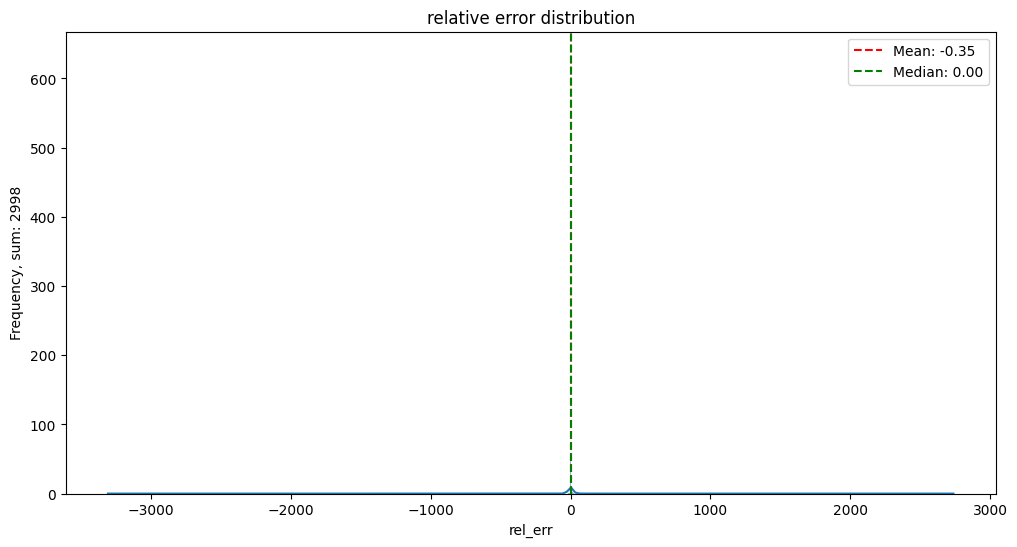

In [78]:
pd_tools.plot_hist_mm_lines(predictions['rel_err'], 'relative error')

In [ ]:
predictions = model.transform(test_data_transformed.select('features', 'x'))
predictions.show(5)

+--------------------+------------------+-------------------+
|            features|             label|         prediction|
+--------------------+------------------+-------------------+
|(12,[6,7,8,9,10,1...|-4305.652096671342| -4308.517536114145|
|(12,[6,7,8,9,10,1...| -4306.46547426193|-4308.5590955020125|
|(12,[6,7,8,9,10,1...|-4306.779007063473|-4308.5590955020125|
|(12,[6,7,8,9,10,1...|-4307.701138155361|-4308.5590955020125|
|(12,[6,7,8,9,10,1...|-4308.445435301533| -4309.996531935143|
+--------------------+------------------+-------------------+
only showing top 5 rows



In [75]:
# Calculate Mean Squared Error
evaluator_mse = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
mse = evaluator_mse.evaluate(predictions)
evaluator_mae = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="mae")
mae = evaluator_mae.evaluate(predictions)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 8.845634249620122
Mean Absolute Error (MAE): 5.5194811030703095


In [33]:
test_data_transformed.show()

+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|  stamp_ns|acceleration_level|           steering|                  x|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day|            features|
+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|3066793076|              -132|-2.5444222994575325| -4305.652096671342|         0|            0|                         0|                          0|         0|        0|     2022|         3|      14|(12,[6,7,8,9,10,1...|
|3267384871|              -162| -2.382064004182096|  -4306.46547426193|         0|            0|        

In [27]:
train_data_transformed.show(5)

+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|  stamp_ns|acceleration_level|           steering|                  x|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day|            features|
+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|2987440736|              -114| -2.655139533023165| -4305.325027045072|         0|            0|                         0|                          0|         0|        0|     2022|         3|      14|(12,[6,7,8,9,10,1...|
|3027341070|              -123|-2.5981690804828066| -4305.489154772268|         0|            0|        

In [17]:
# train_data_transformed.select('features').show()
# .withColumnRenamed('train_target_x', train_target_x.select('x')).show(5)

train_target_x.select('x').show(5)


+-------------------+
|                  x|
+-------------------+
| -4305.325027045072|
| -4305.489154772268|
| -4305.815554919963|
| -4305.979063002069|
|-4306.1407354508965|
+-------------------+
only showing top 5 rows



In [18]:
control_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[0]}', header=True, inferSchema=True)
localization_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[1]}', header=True, inferSchema=True)
metadata_sp = spark_read_metadata(data_train_path, train_ids, 0, files_temp)

In [21]:
def find_min_max(control, localization):
    '''Find min and max timestamp in localization for each timestamp in control dataframe'''
    
    # Join control with localization to find the closest timestamps
    control_with_min_max = control.alias('control').join(
        localization.alias('localization'),
        on=F.col('localization.stamp_ns') >= F.col('control.stamp_ns'),
        how='left'
    ).withColumn(
        'loc_stamp_max',
        F.min('localization.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
    # ).join(
    #     localization.alias('localization_min'),
    #     on=F.col('localization_min.stamp_ns') < F.col('control.stamp_ns'),
    #     how='left'
    # ).withColumn(
    #     'loc_stamp_min',
    #     F.max('localization_min.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
    )

    return control_with_min_max.select('control.*', 'loc_stamp_min', 'loc_stamp_max')

In [22]:
find_min_max(control_sp, localization_sp).show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `loc_stamp_min` cannot be resolved. Did you mean one of the following? [`loc_stamp_max`, `control`.`stamp_ns`, `localization`.`x`, `localization`.`y`, `localization`.`z`].;
'Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, 'loc_stamp_min, loc_stamp_max#1684L]
+- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449, loc_stamp_max#1684L]
   +- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449, loc_stamp_max#1684L, loc_stamp_max#1684L]
      +- Window [min(stamp_ns#1443L) windowspecdefinition(stamp_ns#1420L, specifiedwindowframe(RowFrame, unboundedpreceding$(), unboundedfollowing$())) AS loc_stamp_max#1684L], [stamp_ns#1420L]
         +- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449]
            +- Join LeftOuter, (stamp_ns#1443L >= stamp_ns#1420L)
               :- SubqueryAlias control
               :  +- Relation [stamp_ns#1420L,acceleration_level#1421,steering#1422] csv
               +- SubqueryAlias localization
                  +- Relation [stamp_ns#1443L,x#1444,y#1445,z#1446,roll#1447,pitch#1448,yaw#1449] csv


In [16]:
def make_spark_df_model(control:SparkDataFrame, localization:SparkDataFrame, metadata:SparkDataFrame):

    
    def find_min_max(control, localization):
        '''Find min and max timestamp in localization for each timestamp in control dataframe'''
        
        # Join control with localization to find the closest timestamps
        control_with_min_max = control.alias('control').join(
            localization.alias('localization'),
            on=F.col('localization.stamp_ns') >= F.col('control.stamp_ns'),
            how='left'
        ).withColumn(
            'loc_stamp_max',
            F.min('localization.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
        ).join(
            localization.alias('localization_min'),
            on=F.col('localization_min.stamp_ns') < F.col('control.stamp_ns'),
            how='left'
        ).withColumn(
            'loc_stamp_min',
            F.max('localization_min.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
        )

        return control_with_min_max.select('control.*', 'loc_stamp_min', 'loc_stamp_max')
    
    def merge_min_max(control_2m, localization):
        '''Merge min and max timestamp in localization for each timestamp in control dataframe'''
        
        control_3m = control_2m.join(
            localization.withColumnRenamed('stamp_ns', 'stamp_ns_max').alias('localization_max'),
            on=control_2m['loc_stamp_max'] == F.col('localization_max.stamp_ns_max'),
            how='left'
        ).join(
            localization.withColumnRenamed('stamp_ns', 'stamp_ns_min').alias('localization_min'),
            on=control_2m['loc_stamp_min'] == F.col('localization_min.stamp_ns_min'),
            how='left'
        )

        # Rename columns for clarity
        for col in ['x', 'y', 'z', 'roll', 'pitch', 'yaw']:
            control_3m = control_3m.withColumnRenamed(f'localization_max.{col}', f'{col}_max')
            control_3m = control_3m.withColumnRenamed(f'localization_min.{col}', f'{col}_min')

        return control_3m.drop('loc_stamp_max', 'loc_stamp_min')
    
    def interpolate_coords(control_3m, col_min, col_max):
        '''Interpolate values between max and min values'''
        
        interpolation_expr = (
            (F.col('stamp_ns') - F.col('stamp_ns_min')) / (F.col('stamp_ns_max') - F.col('stamp_ns_min')) *
            (F.col(col_max) - F.col(col_min)) + F.col(col_min)
        )
        
        return control_3m.withColumn(col_min.split('_')[0], interpolation_expr)

    control_2m = find_min_max(control, localization)
    control_3m = merge_min_max(control_2m, localization)

    # Interpolate each coordinate column
    coords_cols = ['x', 'y', 'z', 'roll', 'pitch', 'yaw']
    for col in coords_cols:
        control_3m = interpolate_coords(control_3m, f'{col}_min', f'{col}_max')
    
    contr_cols = ['stamp_ns', 'acceleration_level', 'steering']
    control_inter = control_3m.select(*contr_cols, *coords_cols)
    
    def tires_to_columns_date(metadata):
        '''Change tires column to front and rear columns and convert ride_date to datetime and add year, month, day columns'''
        
        # Add columns for front and rear tires
        metadata_with_tires = metadata.withColumn('front_tire', F.col('tires')[0]) \
                                      .withColumn('rear_tire', F.col('tires')[1]) \
                                      .drop('tires')
        
        # Convert ride_date to datetime and extract year, month, day
        metadata_with_tires = metadata_with_tires.withColumn('ride_date', F.to_date(F.col('ride_date'))) \
                                                 .withColumn('ride_year', F.year(F.col('ride_date'))) \
                                                 .withColumn('ride_month', F.month(F.col('ride_date'))) \
                                                 .withColumn('ride_day', F.dayofmonth(F.col('ride_date'))) \
                                                 .drop('ride_date')
        
        return metadata_with_tires

    def add_metadata(control, metadata):
        '''Add metadata to each row in control dataframe'''
        
        metadata_row = metadata.first()  # Assuming only one row for metadata
        for col in metadata.columns:
            control = control.withColumn(col, F.lit(metadata_row[col]))
        
        return control

    # Process metadata
    metadata_m = tires_to_columns_date(metadata)
    
    # Add metadata to each row in the control DataFrame
    control_model = add_metadata(control_inter, metadata_m)

    return control_model


In [34]:
control_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[0]}', header=True, inferSchema=True)
localization_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[1]}', header=True, inferSchema=True)
metadata_sp = spark_read_metadata(data_train_path, train_ids, 0, files_temp)


In [126]:
files_temp

['control.csv', 'localization.csv', 'metadata.json']

In [ ]:
# read data in each file
def read_data_pandas(path: str, ids: pd.Series, files: list):
    '''Read data in each file'''
    for i in ids:
        data = []
        for file in files:
            if file == 'control.csv':
                data.append(pd.read_csv(f'{path}/{i}/{file}'))
            elif file.endswith('.json'):
                data.append(json.load(open(f'{path}/{i}/{file}')))
    return data

In [123]:
# read data in each file with spark
def read_data_spark(path: str, ids: pd.Series, files: list):
    '''Read data in each file with spark'''
    for i in ids:
        data = []
        for file in files:
            if file == 'control.csv':
                conrtol = spark.read.csv(f'{path}/{i}/{file}', header=True, inferSchema=True)
            elif file == 'localization.csv':
                localization = spark.read.csv(f'{path}/{i}/{file}', header=True, inferSchema=True)
            elif file == 'metadata.json':
                metadata = spark.read.json(f'{path}/{i}/{file}', multiLine=True, mode='PERMISSIVE'))
   
    
    return 